In [5]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as scs
from statsmodels.stats.proportion import proportions_ztest

plt.style.use('ggplot')

In [6]:
path = '/Users/arun/Galvanize/Capstone1/COVID19-Deaths-USA'

In [7]:
# read the covid19_deaths data
df_death = pd.read_csv(path + '/Data/COVID19DeathsData/COVID19-Deaths-20200717.csv', delimiter=',') 
df_death.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4761 entries, 0 to 4760
Data columns (total 13 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Data as of                                4761 non-null   object 
 1   Start week                                4761 non-null   object 
 2   End Week                                  4761 non-null   object 
 3   State                                     4761 non-null   object 
 4   Age group                                 4761 non-null   object 
 5   Race and Hispanic Origin Group            4761 non-null   object 
 6   COVID-19 Deaths                           3794 non-null   float64
 7   Total Deaths                              3206 non-null   float64
 8   Pneumonia Deaths                          3606 non-null   float64
 9   Pneumonia and COVID-19 Deaths             3950 non-null   float64
 10  Influenza Deaths                    

In [8]:
# These are deaths as of 
# sanity checks
# what are the total deaths
df_death['COVID-19 Deaths'].sum()

482879.0

### 482879 COVID deaths! That's definitely not right! Turns out, the data has rows for State = 'United States' with totals in it. Drop these rows.

### Also, drop Puerto Rico data because we have no census data for Puerto Rico

In [9]:
# create a new df excluding the row for 'State' = 'United States', to get deaths for States Only (df_death_so)
df_death_so = df_death[(df_death.State != 'Puerto Rico') & (df_death.State != 'United States')]
df_death_so.head()

,Data as of,Start week,End Week,State,Age group,Race and Hispanic Origin Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote
97,07/15/2020,02/01/2020,07/11/2020,Alabama,Under 1 year,Non-Hispanic White,0.0,50.0,0.0,0.0,0.0,0.0,NaN
98,07/15/2020,02/01/2020,07/11/2020,Alabama,1-4 years,Non-Hispanic White,0.0,19.0,0.0,0.0,NaN,NaN,One or more data cells have counts between 1�9...
99,07/15/2020,02/01/2020,07/11/2020,Alabama,5-14 years,Non-Hispanic White,0.0,29.0,NaN,0.0,0.0,NaN,One or more data cells have counts between 1�9...
100,07/15/2020,02/01/2020,07/11/2020,Alabama,15-24 years,Non-Hispanic White,0.0,145.0,NaN,0.0,0.0,NaN,One or more data cells have counts between 1�9...
101,07/15/2020,02/01/2020,07/11/2020,Alabama,25-34 years,Non-Hispanic White,NaN,298.0,NaN,0.0,NaN,NaN,One or more data cells have counts between 1�9...


In [10]:
df_death_so['COVID-19 Deaths'].sum()

118626.0

### Now change all State = 'New York City' to 'New York'

In [11]:
df_death_so.State[df_death_so.State == 'New York City'] = 'New York'

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:8767: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


### 118626 deaths is a number that checks out with what we know.

In [12]:
df_death_so.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4576 entries, 97 to 4672
Data columns (total 13 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Data as of                                4576 non-null   object 
 1   Start week                                4576 non-null   object 
 2   End Week                                  4576 non-null   object 
 3   State                                     4576 non-null   object 
 4   Age group                                 4576 non-null   object 
 5   Race and Hispanic Origin Group            4576 non-null   object 
 6   COVID-19 Deaths                           3616 non-null   float64
 7   Total Deaths                              3044 non-null   float64
 8   Pneumonia Deaths                          3432 non-null   float64
 9   Pneumonia and COVID-19 Deaths             3773 non-null   float64
 10  Influenza Deaths                   

In [13]:
# Now let's group by state
df_death_so_State = df_death_so.groupby(['State']).sum()

In [14]:
df_death_so_State.head()

,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths"
State,,,,,,
Alabama,1014.0,24256.0,1593.0,288.0,45.0,2408.0
Alaska,0.0,1582.0,21.0,0.0,0.0,45.0
Arizona,1538.0,30782.0,2491.0,780.0,51.0,3356.0
Arkansas,203.0,14359.0,896.0,35.0,41.0,1124.0
California,5786.0,127986.0,11702.0,3197.0,481.0,14902.0


In [15]:
df_death_so_State.head()

,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths"
State,,,,,,
Alabama,1014.0,24256.0,1593.0,288.0,45.0,2408.0
Alaska,0.0,1582.0,21.0,0.0,0.0,45.0
Arizona,1538.0,30782.0,2491.0,780.0,51.0,3356.0
Arkansas,203.0,14359.0,896.0,35.0,41.0,1124.0
California,5786.0,127986.0,11702.0,3197.0,481.0,14902.0


In [16]:
df_death_so_State['COVID-19 Deaths'].sum()

118626.0

In [17]:
x = df_death_so_State.index
x

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
       'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object', name='State')

In [18]:
def plot_bar(title, xlabel, ylabel, xticklabels, xdata, ydata, figname, xtickrotation=80):
    fig, ax = plt.subplots(figsize=(20,10))
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    #ax.set_xticks(len(df_death_so_State.index))
    ax.set_xticklabels(xticklabels) # df_death_so_State.index)
    ax.tick_params(axis='x', rotation=xtickrotation)
    _ = ax.bar(xdata, ydata )
    
    plt.savefig(path + '/Images/' + figname)
    
    return

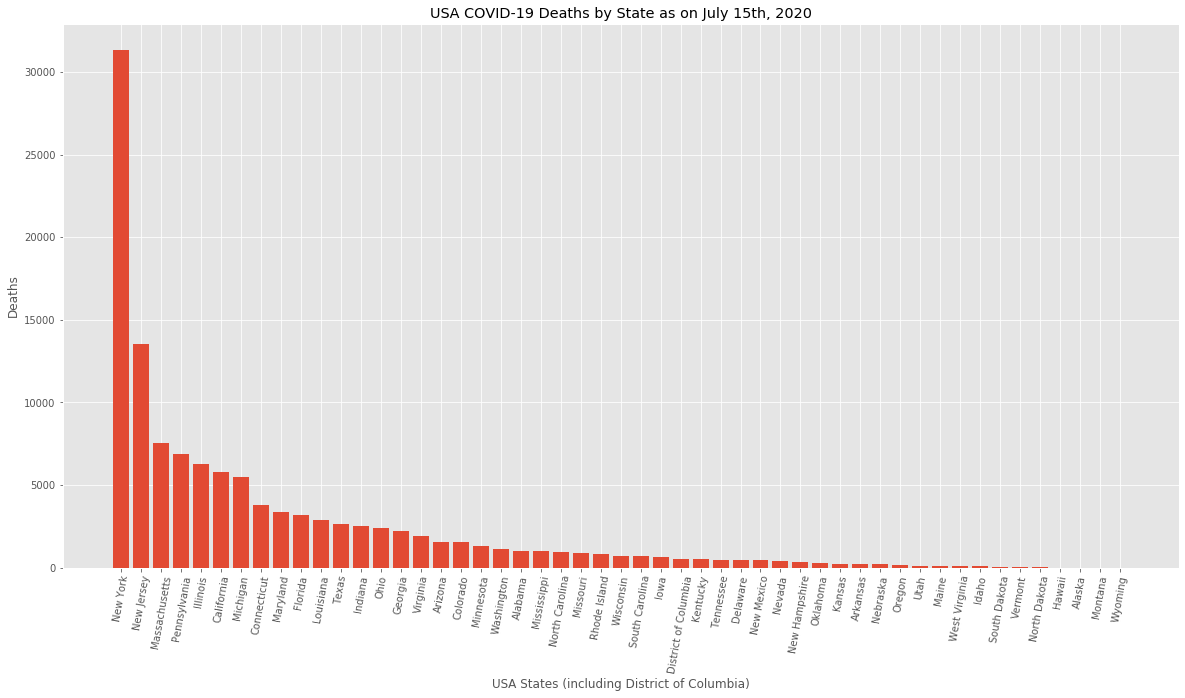

In [19]:
# Sort based on deaths/million descending
df_death_so_State_sorted = df_death_so_State.sort_values(by ='COVID-19 Deaths' , ascending=False)
df_death_so_State_sorted.reset_index()
# plot
plot_bar("USA COVID-19 Deaths by State as on July 15th, 2020",  \
         "USA States (including District of Columbia)",         \
         "Deaths",                                              \
         df_death_so_State_sorted.index,                        \
         df_death_so_State_sorted.index,                        \
         df_death_so_State_sorted['COVID-19 Deaths'],                  \
         'df_death_so_state_sorted',                                   \
         80)

# Now let's look at the population data

In [20]:
# read the census data by state
df_pop = pd.read_csv(path + '/Data/CensusData/CensusDataByState.txt', delimiter='\t') 
df_pop.head()

,Notes,State,State Code,Population
0,NaN,Alabama,1.0,4887871.0
1,NaN,Alaska,2.0,737438.0
2,NaN,Arizona,4.0,7171646.0
3,NaN,Arkansas,5.0,3013825.0
4,NaN,California,6.0,39557045.0


In [21]:
# Slice only the data for the 51 states (including DC)
df_pop = df_pop.iloc[0:51, ]

In [22]:
df_pop = df_pop.loc[:, ['State', 'Population']]

In [23]:
df_pop.head()

,State,Population
0,Alabama,4887871.0
1,Alaska,737438.0
2,Arizona,7171646.0
3,Arkansas,3013825.0
4,California,39557045.0


### Join the deaths data with the population by state data

In [24]:
df_death_so_State_Pop = df_death_so_State.merge(df_pop, how='inner', left_on='State', right_on='State')
# golf_df.merge(mood_df, how='inner', left_on='Outlook', right_on='Weather')
df_death_so_State_Pop.head()

,State,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Population
0,Alabama,1014.0,24256.0,1593.0,288.0,45.0,2408.0,4887871.0
1,Alaska,0.0,1582.0,21.0,0.0,0.0,45.0,737438.0
2,Arizona,1538.0,30782.0,2491.0,780.0,51.0,3356.0,7171646.0
3,Arkansas,203.0,14359.0,896.0,35.0,41.0,1124.0,3013825.0
4,California,5786.0,127986.0,11702.0,3197.0,481.0,14902.0,39557045.0


### Normalize deaths data

In [25]:
# Normalize COVID deaths
df_death_so_State_Pop['COVID-19 Deaths per Million'] = \
    round(df_death_so_State_Pop['COVID-19 Deaths'] /   \
          df_death_so_State_Pop['Population'] * 1000000, 2)
# Normalize Pneumonia deaths
df_death_so_State_Pop['Pneumonia Deaths per Million'] = \
    round(df_death_so_State_Pop['Pneumonia Deaths'] /   \
          df_death_so_State_Pop['Population'] * 1000000, 2)
# Normalize Influenza deaths
df_death_so_State_Pop['Influenza Deaths per Million'] = \
    round(df_death_so_State_Pop['Influenza Deaths'] /   \
          df_death_so_State_Pop['Population'] * 1000000, 2)

In [26]:
df_death_so_State_Pop.head()

,State,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Population,COVID-19 Deaths per Million,Pneumonia Deaths per Million,Influenza Deaths per Million
0,Alabama,1014.0,24256.0,1593.0,288.0,45.0,2408.0,4887871.0,207.45,325.91,9.21
1,Alaska,0.0,1582.0,21.0,0.0,0.0,45.0,737438.0,0.00,28.48,0.00
2,Arizona,1538.0,30782.0,2491.0,780.0,51.0,3356.0,7171646.0,214.46,347.34,7.11
3,Arkansas,203.0,14359.0,896.0,35.0,41.0,1124.0,3013825.0,67.36,297.30,13.60
4,California,5786.0,127986.0,11702.0,3197.0,481.0,14902.0,39557045.0,146.27,295.83,12.16


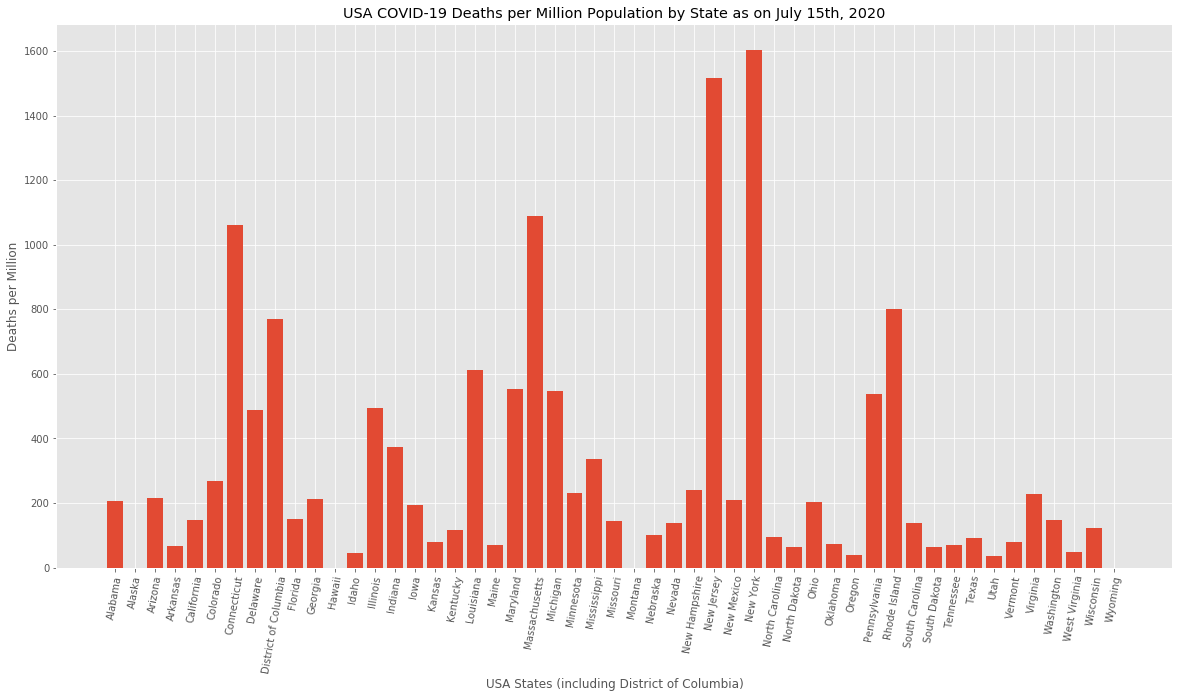

In [36]:
plot_bar("USA COVID-19 Deaths per Million Population by State as on July 15th, 2020", \
         "USA States (including District of Columbia)",        \
         "Deaths per Million",                                             \
         df_death_so_State_Pop.State,                               \
         df_death_so_State_Pop.State,                               \
         df_death_so_State_Pop['COVID-19 Deaths per Million'],                  \
         'df_death_so_State_Pop_per_Million', \
         80)

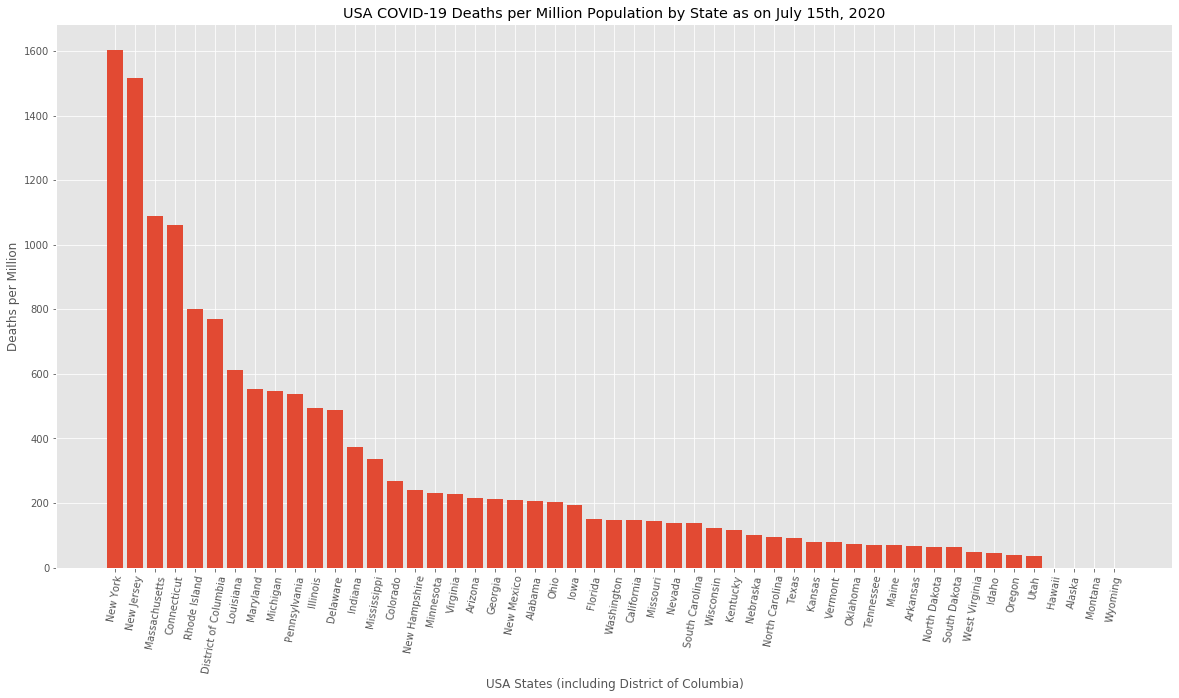

In [532]:
# plot sorted by deaths normalized and sorted
# Sort based on deaths/million descending
df_death_so_State_Pop_sorted = df_death_so_State_Pop.sort_values(by ='COVID-19 Deaths per Million' , ascending=False)
df_death_so_State_Pop_sorted.reset_index()
df_death_so_State_Pop_sorted.head()
plot_bar("USA COVID-19 Deaths per Million Population by State as on July 15th, 2020", \
         "USA States (including District of Columbia)", \
         "Deaths per Million", \
         df_death_so_State_Pop_sorted.State, \
         df_death_so_State_Pop_sorted.State, \
         df_death_so_State_Pop_sorted['COVID-19 Deaths per Million'], \
         'df_death_so_State_Pop_sorted', \
         80)

### Store the entire cleaned deaths data as a csv file

In [533]:
# Store the cleaned deaths data set with United States, Puerto Rico and 
# NYC numbers merged into New York state - this can be the new starting point for the next analyses
df_death_so.to_csv(path + '/Data/OutputData/df_death_so.csv', index=False)

### Store the deaths per million by state joined with population by state as a csv file

In [534]:
# Store the cleaned data grouped by states, with deaths per 100,000 population
df_death_so_State_Pop.to_csv(path + '/Data/OutputData/df_death_so_State_Pop.csv', index=False)

## Get population data by State and ethicity/race

In [535]:
df_pop_state_eth_race = pd.read_csv(path + '/Data/CensusData/CensusDataByStateEthnicityRace.txt', '\t')

In [536]:
# drop unneeded columns
df_pop_state_eth_race = df_pop_state_eth_race[['State', 'Ethnicity', 'Race', 'Population']]
# drop NaN values as these are State totals and ethnicity totals
df_pop_state_eth_race = df_pop_state_eth_race.dropna()
df_pop_state_eth_race.head()

,State,Ethnicity,Race,Population
0,Alabama,Hispanic or Latino,American Indian or Alaska Native,7646.0
1,Alabama,Hispanic or Latino,Asian or Pacific Islander,5033.0
2,Alabama,Hispanic or Latino,Black or African American,17697.0
3,Alabama,Hispanic or Latino,White,186805.0
5,Alabama,Not Hispanic or Latino,American Indian or Alaska Native,30144.0


### First get the Hispanic data only

In [537]:
# Drop all the 'Not Hisp...' rows
df_pop_state_eth_race_hisponly \
= df_pop_state_eth_race[df_pop_state_eth_race['Ethnicity'] != 'Not Hispanic or Latino']
df_pop_state_eth_race_hisponly.head()

,State,Ethnicity,Race,Population
0,Alabama,Hispanic or Latino,American Indian or Alaska Native,7646.0
1,Alabama,Hispanic or Latino,Asian or Pacific Islander,5033.0
2,Alabama,Hispanic or Latino,Black or African American,17697.0
3,Alabama,Hispanic or Latino,White,186805.0
11,Alaska,Hispanic or Latino,American Indian or Alaska Native,7695.0


In [538]:
# Combine all the Hispanic or Latino into a single row for each state
df_pop_state_eth_hisponly = df_pop_state_eth_race_hisponly.groupby(['State', 'Ethnicity']).sum().reset_index()
df_pop_state_eth_hisponly.head()

,State,Ethnicity,Population
0,Alabama,Hispanic or Latino,217181.0
1,Alaska,Hispanic or Latino,53288.0
2,Arizona,Hispanic or Latino,2266343.0
3,Arkansas,Hispanic or Latino,233187.0
4,California,Hispanic or Latino,15540142.0


In [539]:
# rename the column name
df_pop_state_eth_hisponly.rename(columns={'Ethnicity':'Race and Hispanic Origin Group'}, inplace=True)
df_pop_state_eth_hisponly.head()

,State,Race and Hispanic Origin Group,Population
0,Alabama,Hispanic or Latino,217181.0
1,Alaska,Hispanic or Latino,53288.0
2,Arizona,Hispanic or Latino,2266343.0
3,Arkansas,Hispanic or Latino,233187.0
4,California,Hispanic or Latino,15540142.0


### Then get the Non-Hispanic data

In [540]:
# now get the non-hispanic data into a shape that can be appended to the hispanic only dataframe

# start again from the cleaned pop data by state
df_pop_state_eth_race = pd.read_csv(path + '/Data/CensusData/CensusDataByStateEthnicityRace.txt', '\t')

# drop unneeded columns
df_pop_state_eth_race = df_pop_state_eth_race[['State', 'Ethnicity', 'Race', 'Population']]

# drop NaN values as these are State totals and ethnicity totals
df_pop_state_eth_race = df_pop_state_eth_race.dropna()
df_pop_state_eth_race.head()

# Drop all the 'Hisp...' rows
df_pop_state_eth_race_nonhisponly \
= df_pop_state_eth_race[df_pop_state_eth_race['Ethnicity'] != 'Hispanic or Latino']

# change the values in the 'Ethnicity and Race' column to match the Deaths database

#     Deaths Data                                                            Population Data
# Hispanic or Latino                                        Hispanic or Latino: American Indian or Alaska Native
#                                                           Hispanic or Latino: Asian or Pacigic Islander
#                                                           Hispanic or Latino: Black or African American
#                                                           Hispanic or Latino: White
# Non-Hispanic American Indian or Alaska Native             Not Hispanic or Latino: American Indian or Alaska Native
# Non-Hispanic Asian                                        Not Hispanic or Latino: Asian or Pacific Islander
# Non-Hispanic Black                                        Non Hispanic or Latino: Black or African American
# Non-Hispanic More than one race                           ???? 
# Non-Hispanic Native Hawaiian or Other Pacific Islander    ????
# Non-Hispanic White                                        Non Hispanic or Latino: White
# Unknown                                                   ????

# Change Ethnicity "Not Hispanic or Latino" values to "Non-Hispanic"
df_pop_state_eth_race_nonhisponly['Ethnicity'] \
    = df_pop_state_eth_race_nonhisponly['Ethnicity'] \
        .replace(['Not Hispanic or Latino'], ['Non-Hispanic'])

# Change Race "Asian or Pacific Islander" values to "Asian", "Black or African American" to "Black" 
df_pop_state_eth_race_nonhisponly['Race'] \
    = df_pop_state_eth_race_nonhisponly['Race'] \
        .replace(['Asian or Pacific Islander', 'Black or African American'], ['Asian', 'Black'])

# Create the new column for Ethnicity + Race
df_pop_state_eth_race_nonhisponly['Race and Hispanic Origin Group'] = \
    df_pop_state_eth_race_nonhisponly['Ethnicity'] \
  + ' ' \
  + df_pop_state_eth_race_nonhisponly['Race']

# drop the separate Ethnicity and Race columns, and rename the dataframe
df_pop_state_eth_nonhisponly = df_pop_state_eth_race_nonhisponly.drop(columns = ['Ethnicity', 'Race'])

# reorder the columns to match the hispanic df
df_pop_state_eth_nonhisponly = \
    df_pop_state_eth_nonhisponly.reindex(columns = ['State', 'Race and Hispanic Origin Group', 'Population'])

df_pop_state_eth_nonhisponly.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

,State,Race and Hispanic Origin Group,Population
5,Alabama,Non-Hispanic American Indian or Alaska Native,30144.0
6,Alabama,Non-Hispanic Asian,79457.0
7,Alabama,Non-Hispanic Black,1321149.0
8,Alabama,Non-Hispanic White,3239940.0
16,Alaska,Non-Hispanic American Indian or Alaska Native,120338.0


### Now combine the Hispanic only and Non-Hispanic dataframes

In [541]:
# combine the 2 dataframes = [df1, df2, df3]
df_pop_state_eth = pd.concat([df_pop_state_eth_hisponly, df_pop_state_eth_nonhisponly])
df_pop_state_eth.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 255 entries, 0 to 558
Data columns (total 3 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   State                           255 non-null    object 
 1   Race and Hispanic Origin Group  255 non-null    object 
 2   Population                      255 non-null    float64
dtypes: float64(1), object(2)
memory usage: 8.0+ KB


### Save the cleaned population data (by 'State' and 'Race and Hispanic Origin Group')

In [542]:
# Store the cleaned population data for 'State', 'Race and Hispanic Origin Group'
df_pop_state_eth.to_csv(path + '/Data/OutputData/df_pop_state_eth.csv', index=False)

### Join the deaths data

In [543]:
# Read in the cleaned deaths data
df_death_so = pd.read_csv(path + '/Data/OutputData/df_death_so.csv')
df_death_so.head()

,Data as of,Start week,End Week,State,Age group,Race and Hispanic Origin Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote
0,07/15/2020,02/01/2020,07/11/2020,Alabama,Under 1 year,Non-Hispanic White,0.0,50.0,0.0,0.0,0.0,0.0,NaN
1,07/15/2020,02/01/2020,07/11/2020,Alabama,1-4 years,Non-Hispanic White,0.0,19.0,0.0,0.0,NaN,NaN,One or more data cells have counts between 1�9...
2,07/15/2020,02/01/2020,07/11/2020,Alabama,5-14 years,Non-Hispanic White,0.0,29.0,NaN,0.0,0.0,NaN,One or more data cells have counts between 1�9...
3,07/15/2020,02/01/2020,07/11/2020,Alabama,15-24 years,Non-Hispanic White,0.0,145.0,NaN,0.0,0.0,NaN,One or more data cells have counts between 1�9...
4,07/15/2020,02/01/2020,07/11/2020,Alabama,25-34 years,Non-Hispanic White,NaN,298.0,NaN,0.0,NaN,NaN,One or more data cells have counts between 1�9...


In [544]:
# Keep only the columns we want
df_death_state_eth_age = df_death_so.drop(columns = \
                                            ['Data as of', \
                                             'Start week', \
                                             'End Week', \
                                             'Total Deaths', \
                                             'Pneumonia, Influenza, or COVID-19 Deaths', \
                                             'Pneumonia and COVID-19 Deaths', \
                                             'Footnote'])
df_death_state_eth_age.head()

,State,Age group,Race and Hispanic Origin Group,COVID-19 Deaths,Pneumonia Deaths,Influenza Deaths
0,Alabama,Under 1 year,Non-Hispanic White,0.0,0.0,0.0
1,Alabama,1-4 years,Non-Hispanic White,0.0,0.0,NaN
2,Alabama,5-14 years,Non-Hispanic White,0.0,NaN,0.0
3,Alabama,15-24 years,Non-Hispanic White,0.0,NaN,0.0
4,Alabama,25-34 years,Non-Hispanic White,NaN,NaN,NaN


In [545]:
# Group by State and Eth across all Age Group
df_death_state_eth = df_death_state_eth_age.groupby \
    (['State', 'Race and Hispanic Origin Group']).sum().reset_index()
df_death_state_eth.head()

,State,Race and Hispanic Origin Group,COVID-19 Deaths,Pneumonia Deaths,Influenza Deaths
0,Alabama,Hispanic or Latino,12.0,0.0,0.0
1,Alabama,Non-Hispanic American Indian or Alaska Native,0.0,0.0,0.0
2,Alabama,Non-Hispanic Asian,0.0,0.0,0.0
3,Alabama,Non-Hispanic Black,487.0,413.0,0.0
4,Alabama,Non-Hispanic More than one race,0.0,0.0,0.0


### Join the Population data to the Deaths data

In [546]:
# Now, we are ready to join
df_death_state_eth_pop = df_death_state_eth.merge \
                        (df_pop_state_eth, how='inner', \
                         left_on=['State', 'Race and Hispanic Origin Group'], \
                         right_on=['State','Race and Hispanic Origin Group'])

### Normalize to deaths per million

In [547]:
# Normalize COVID-19 Deaths to a new deaths per million column
df_death_state_eth_pop['COVID-19 Deaths per Million'] \
    = round(df_death_state_eth_pop['COVID-19 Deaths'] \
            / df_death_state_eth_pop['Population'] * 1_000_000, 2)
df_death_state_eth_pop.head()
# Normalize Pneumonia Deaths to a new deaths per million column
df_death_state_eth_pop['Pneumonia Deaths per Million'] \
    = round(df_death_state_eth_pop['Pneumonia Deaths'] \
            / df_death_state_eth_pop['Population'] * 1_000_000, 2)
df_death_state_eth_pop.head()
# Normalize Influenza Deaths to a new deaths per million column
df_death_state_eth_pop['Influenza Deaths per Million'] \
    = round(df_death_state_eth_pop['Influenza Deaths'] \
            / df_death_state_eth_pop['Population'] * 1_000_000, 2)
df_death_state_eth_pop.head()

,State,Race and Hispanic Origin Group,COVID-19 Deaths,Pneumonia Deaths,Influenza Deaths,Population,COVID-19 Deaths per Million,Pneumonia Deaths per Million,Influenza Deaths per Million
0,Alabama,Hispanic or Latino,12.0,0.0,0.0,217181.0,55.25,0.00,0.00
1,Alabama,Non-Hispanic American Indian or Alaska Native,0.0,0.0,0.0,30144.0,0.00,0.00,0.00
2,Alabama,Non-Hispanic Asian,0.0,0.0,0.0,79457.0,0.00,0.00,0.00
3,Alabama,Non-Hispanic Black,487.0,413.0,0.0,1321149.0,368.62,312.61,0.00
4,Alabama,Non-Hispanic White,515.0,1180.0,45.0,3239940.0,158.95,364.20,13.89


### Save the Deaths per Million by State and Race as a csv file

In [548]:
df_death_state_eth_pop.to_csv(path + '/Data/OutputData/df_death_state_eth_pop.csv', index=False)

### Read the Deaths per Million by State and Race from the csv file

In [549]:
df_death_state_eth_pop = pd.read_csv(path + '/Data/OutputData/df_death_state_eth_pop.csv')

### Plot this data

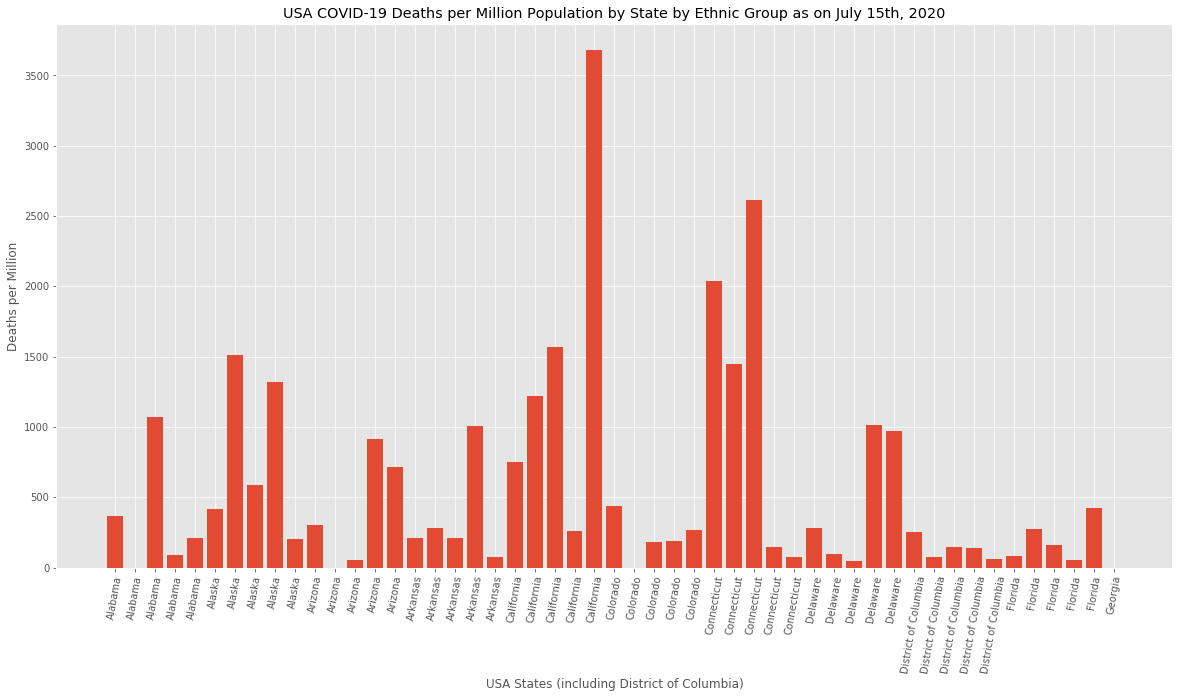

In [550]:
plot_bar("USA COVID-19 Deaths per Million Population by State by Ethnic Group as on July 15th, 2020", \
         "USA States (including District of Columbia)",        \
         "Deaths per Million",                                             \
         df_death_state_eth_pop.State,                               \
         df_death_state_eth_pop.State,                               \
         df_death_state_eth_pop['COVID-19 Deaths per Million'],                  \
         'df_death_state_eth_pop', \
         80)

# Get population data by State and AgeGroup (not Ethnicity/race)

In [551]:
df_pop_state_agegroup = pd.read_csv(path + '/Data/CensusData/CensusDataByStateAgegroup.txt', '\t')

In [552]:
# Remove unneeded columns
df_pop_state_agegroup = df_pop_state_agegroup.drop \
    (columns = ['Notes', \
                'State Code', \
                'Age Group Code'])

In [553]:
df_pop_state_agegroup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1053 entries, 0 to 1052
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   State       1020 non-null   object 
 1   Age Group   969 non-null    object 
 2   Population  1021 non-null   float64
dtypes: float64(1), object(2)
memory usage: 24.8+ KB


In [554]:
df_pop_state_agegroup.head(15)

,State,Age Group,Population
0,Alabama,< 1 year,56739.0
1,Alabama,1-4 years,236464.0
2,Alabama,5-9 years,297900.0
3,Alabama,10-14 years,310495.0
4,Alabama,15-19 years,315680.0
5,Alabama,20-24 years,325220.0
6,Alabama,25-29 years,340014.0
7,Alabama,30-34 years,303526.0
8,Alabama,35-39 years,303994.0
9,Alabama,40-44 years,288308.0


### Save the cleaned population data (by 'State' and 'Age Group') as a csv file

In [555]:
# Store the cleaned population data for 'State', 'Age Group'
df_pop_state_agegroup.to_csv(path + '/Data/OutputData/df_pop_state_agegroup.csv', index=False)

### Read the cleaned population data (by 'State and 'Age Group') from the csv file

In [556]:
# Read the cleaned population data for 'State', 'Age Group'
df_pop_state_agegroup = pd.read_csv(path + '/Data/OutputData/df_pop_state_agegroup.csv')

### Get the clean deaths data

In [557]:
# Read in the cleaned deaths data
df_death_so = pd.read_csv(path + '/Data/OutputData/df_death_so.csv')
df_death_so.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4576 entries, 0 to 4575
Data columns (total 13 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Data as of                                4576 non-null   object 
 1   Start week                                4576 non-null   object 
 2   End Week                                  4576 non-null   object 
 3   State                                     4576 non-null   object 
 4   Age group                                 4576 non-null   object 
 5   Race and Hispanic Origin Group            4576 non-null   object 
 6   COVID-19 Deaths                           3616 non-null   float64
 7   Total Deaths                              3044 non-null   float64
 8   Pneumonia Deaths                          3432 non-null   float64
 9   Pneumonia and COVID-19 Deaths             3773 non-null   float64
 10  Influenza Deaths                    

In [558]:
# Keep only the columns we want
df_death_state_agegroup = df_death_so.drop(columns = \
                                            ['Data as of', \
                                             'Start week', \
                                             'End Week', \
                                             #'Race and Hispanic Origin Group', \
                                             'Total Deaths', \
                                             'Pneumonia and COVID-19 Deaths', \
                                             'Pneumonia, Influenza, or COVID-19 Deaths', \
                                             'Footnote'])
df_death_state_agegroup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4576 entries, 0 to 4575
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   State                           4576 non-null   object 
 1   Age group                       4576 non-null   object 
 2   Race and Hispanic Origin Group  4576 non-null   object 
 3   COVID-19 Deaths                 3616 non-null   float64
 4   Pneumonia Deaths                3432 non-null   float64
 5   Influenza Deaths                3825 non-null   float64
dtypes: float64(3), object(3)
memory usage: 214.6+ KB


In [559]:
# Group by State and Age Group
df_death_state_agegroup = df_death_state_agegroup.groupby \
    (['State', 'Age group']).sum().reset_index()
df_death_state_agegroup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State             561 non-null    object 
 1   Age group         561 non-null    object 
 2   COVID-19 Deaths   561 non-null    float64
 3   Pneumonia Deaths  561 non-null    float64
 4   Influenza Deaths  561 non-null    float64
dtypes: float64(3), object(2)
memory usage: 22.0+ KB


### Compare the groupings between the population data and the deaths data

In [560]:
# DEATHS data has the following groups
df_death_state_agegroup['Age group'].unique()

array(['1-4 years', '15-24 years', '25-34 years', '35-44 years',
       '45-54 years', '5-14 years', '55-64 years', '65-74 years',
       '75-84 years', '85 years and over', 'Under 1 year'], dtype=object)

In [561]:
# POPULATION data has the following groups
df_pop_state_agegroup['Age Group'].unique()

array(['< 1 year', '1-4 years', '5-9 years', '10-14 years', '15-19 years',
       '20-24 years', '25-29 years', '30-34 years', '35-39 years',
       '40-44 years', '45-49 years', '50-54 years', '55-59 years',
       '60-64 years ', '65-69 years', '70-74 years', '75-79 years',
       '80-84 years', '85+ years', nan], dtype=object)

#### Will need to transform as follows:

POPULATION 'Age Group'                   vs.               DEATHS 'Age group'

'< 1 year'                                                 'Under 1 year'
'1-4 years'                                                '1-4 years'
'5-9 years', '10-14 years'                                 '5-14 years'
'15-19 years', '20-24 years'                               '15-24 years'
'25-29 years', '30-24 years'                               '25-34 years'
'35-39 years', '40-44 years'                               '35-44 years'
'45-49 years', '50-54 years'                               '45-54 years'
'55-59 years', '60-64 years'                               '55-64 years'
'65-69 years', '70-74 years'                               '65-74 years'
'75-79 years', '80-84 years'                               '75-84 years'
'85+ years'                                                '85 years and over'



#### Do the Age Group values transformations on the Population data

In [562]:
# Clean the Age Group data, do a strip on each value
df_pop_state_agegroup['Age Group'] = df_pop_state_agegroup['Age Group'].str.strip()

# Change Age Group '< 1 year' values to 'Under 1 year', and '85+ years' to '85 years and over'
df_pop_state_agegroup['Age Group'] \
    = df_pop_state_agegroup['Age Group'] \
        .replace(['< 1 year', '85+ years'], ['Under 1 year', '85 years and over'])

# Add up the values in the different groups in POP to the corresponding group  
df_pop_state_agegroup['Age Group'] \
    = df_pop_state_agegroup['Age Group'] \
        .replace(['5-9 years', '10-14 years'], ['5-14 years', '5-14 years'])
df_pop_state_agegroup['Age Group'] \
    = df_pop_state_agegroup['Age Group'] \
        .replace(['15-19 years', '20-24 years'], ['15-24 years', '15-24 years'])
df_pop_state_agegroup['Age Group'] \
    = df_pop_state_agegroup['Age Group'] \
        .replace(['25-29 years', '30-34 years'], ['25-34 years', '25-34 years'])
df_pop_state_agegroup['Age Group'] \
    = df_pop_state_agegroup['Age Group'] \
        .replace(['35-39 years', '40-44 years'], ['35-44 years', '35-44 years'])
df_pop_state_agegroup['Age Group'] \
    = df_pop_state_agegroup['Age Group'] \
        .replace(['45-49 years', '50-54 years'], ['45-54 years', '45-54 years'])
df_pop_state_agegroup['Age Group'] \
    = df_pop_state_agegroup['Age Group'] \
        .replace(['55-59 years', '60-64 years'], ['55-64 years', '55-64 years'])
df_pop_state_agegroup['Age Group'] \
    = df_pop_state_agegroup['Age Group'] \
        .replace(['65-69 years', '70-74 years'], ['65-74 years', '65-74 years'])
df_pop_state_agegroup['Age Group'] \
    = df_pop_state_agegroup['Age Group'] \
        .replace(['75-79 years', '80-84 years'], ['75-84 years', '75-84 years'])


In [563]:
df_pop_state_agegroup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1053 entries, 0 to 1052
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   State       1020 non-null   object 
 1   Age Group   969 non-null    object 
 2   Population  1021 non-null   float64
dtypes: float64(1), object(2)
memory usage: 24.8+ KB


In [564]:
# Now group the pop data
df_pop_state_agegroup = df_pop_state_agegroup.groupby \
    (['State', 'Age Group']).sum().reset_index()
df_pop_state_agegroup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   State       561 non-null    object 
 1   Age Group   561 non-null    object 
 2   Population  561 non-null    float64
dtypes: float64(1), object(2)
memory usage: 13.3+ KB


### Now join the deaths data with the pop data

In [565]:
# DEATHS
df_death_state_agegroup.head()

,State,Age group,COVID-19 Deaths,Pneumonia Deaths,Influenza Deaths
0,Alabama,1-4 years,0.0,0.0,0.0
1,Alabama,15-24 years,0.0,0.0,0.0
2,Alabama,25-34 years,0.0,0.0,0.0
3,Alabama,35-44 years,16.0,40.0,0.0
4,Alabama,45-54 years,69.0,74.0,0.0


In [566]:
# Now, we are ready to join

df_death_state_agegroup_pop = df_death_state_agegroup.merge \
    (df_pop_state_agegroup, how='inner', \
     left_on=['State', 'Age group'], \
     right_on=['State','Age Group'])
df_death_state_agegroup_pop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 561 entries, 0 to 560
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State             561 non-null    object 
 1   Age group         561 non-null    object 
 2   COVID-19 Deaths   561 non-null    float64
 3   Pneumonia Deaths  561 non-null    float64
 4   Influenza Deaths  561 non-null    float64
 5   Age Group         561 non-null    object 
 6   Population        561 non-null    float64
dtypes: float64(4), object(3)
memory usage: 35.1+ KB


In [567]:
# Remove the extra columns
df_death_state_agegroup_pop = df_death_state_agegroup_pop.drop (columns = ['Age group'])

In [568]:
### Normalize to deaths per million

In [569]:
# COVID deaths per million column
df_death_state_agegroup_pop['COVID-19 Deaths per Million'] \
    = round(df_death_state_agegroup_pop['COVID-19 Deaths'] \
            / df_death_state_agegroup_pop['Population'] * 1_000_000, 2)

# Pneumonia deaths per million column
df_death_state_agegroup_pop['Pneumonia Deaths per Million'] \
    = round(df_death_state_agegroup_pop['Pneumonia Deaths'] \
            / df_death_state_agegroup_pop['Population'] * 1_000_000, 2)

# Influenza deaths per million column
df_death_state_agegroup_pop['Influenza Deaths per Million'] \
    = round(df_death_state_agegroup_pop['Influenza Deaths'] \
            / df_death_state_agegroup_pop['Population'] * 1_000_000, 2)


df_death_state_agegroup_pop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 561 entries, 0 to 560
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   State                         561 non-null    object 
 1   COVID-19 Deaths               561 non-null    float64
 2   Pneumonia Deaths              561 non-null    float64
 3   Influenza Deaths              561 non-null    float64
 4   Age Group                     561 non-null    object 
 5   Population                    561 non-null    float64
 6   COVID-19 Deaths per Million   561 non-null    float64
 7   Pneumonia Deaths per Million  561 non-null    float64
 8   Influenza Deaths per Million  561 non-null    float64
dtypes: float64(7), object(2)
memory usage: 43.8+ KB


### Save the joined data with DEATHS per Million by State and Age Group as a csv file

In [570]:
df_death_state_agegroup_pop.to_csv(path + '/Data/OutputData/df_death_state_agegroup_pop.csv', index=False)

### Read the joined data with DEATHS per Million by State and Age Group from the csv file

In [571]:
df_death_state_agegroup_pop = pd.read_csv(path + '/Data/OutputData/df_death_state_agegroup_pop.csv')

### Now get the USA-wide deaths by age group data set up

In [38]:
# Read in the cleaned deaths by state by age group data
df_death_state_agegroup_pop = \
    pd.read_csv(path + '/Data/OutputData/df_death_state_agegroup_pop.csv')
df_death_state_agegroup_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   State                         561 non-null    object 
 1   COVID-19 Deaths               561 non-null    float64
 2   Pneumonia Deaths              561 non-null    float64
 3   Influenza Deaths              561 non-null    float64
 4   Age Group                     561 non-null    object 
 5   Population                    561 non-null    float64
 6   COVID-19 Deaths per Million   561 non-null    float64
 7   Pneumonia Deaths per Million  561 non-null    float64
 8   Influenza Deaths per Million  561 non-null    float64
dtypes: float64(7), object(2)
memory usage: 39.6+ KB


In [39]:
# Group by to check total - sanity check
df_death_agegroup_pop = \
    df_death_state_agegroup_pop.groupby(['Age Group']).sum().reset_index()
df_death_agegroup_pop.head()
df_death_agegroup_pop['Population'].sum()

327167434.0

### Plot USA COVID-19 Deaths per Million Population by Age Group

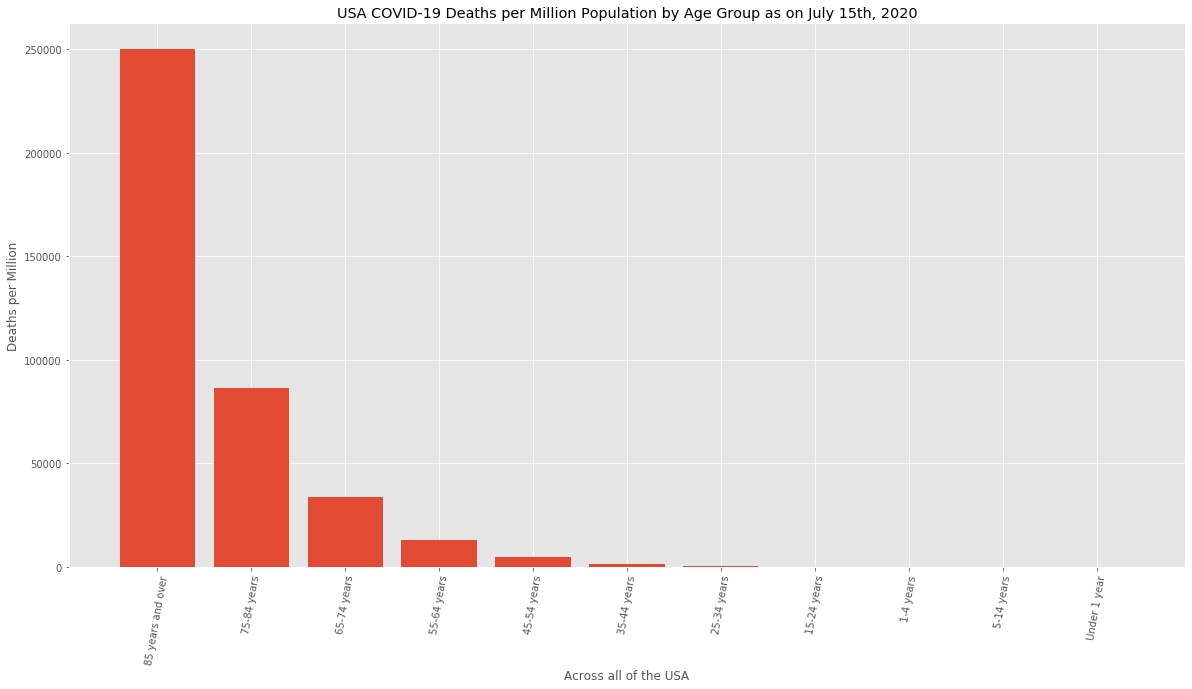

In [40]:
# Sort it by highest death/Million age groups first
df_death_agegroup_pop = df_death_agegroup_pop.sort_values(['COVID-19 Deaths per Million'], ascending=False)

# plot
plot_bar("USA COVID-19 Deaths per Million Population by Age Group as on July 15th, 2020", \
         "Across all of the USA", \
         "Deaths per Million", \
         df_death_agegroup_pop['Age Group'], \
         df_death_agegroup_pop['Age Group'], \
         df_death_agegroup_pop['COVID-19 Deaths per Million'], \
         'df_death_agegroup_pop_per_million', \
         80)

### Plot USA COVID-19 Deaths (Absolute value) by Age Group

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

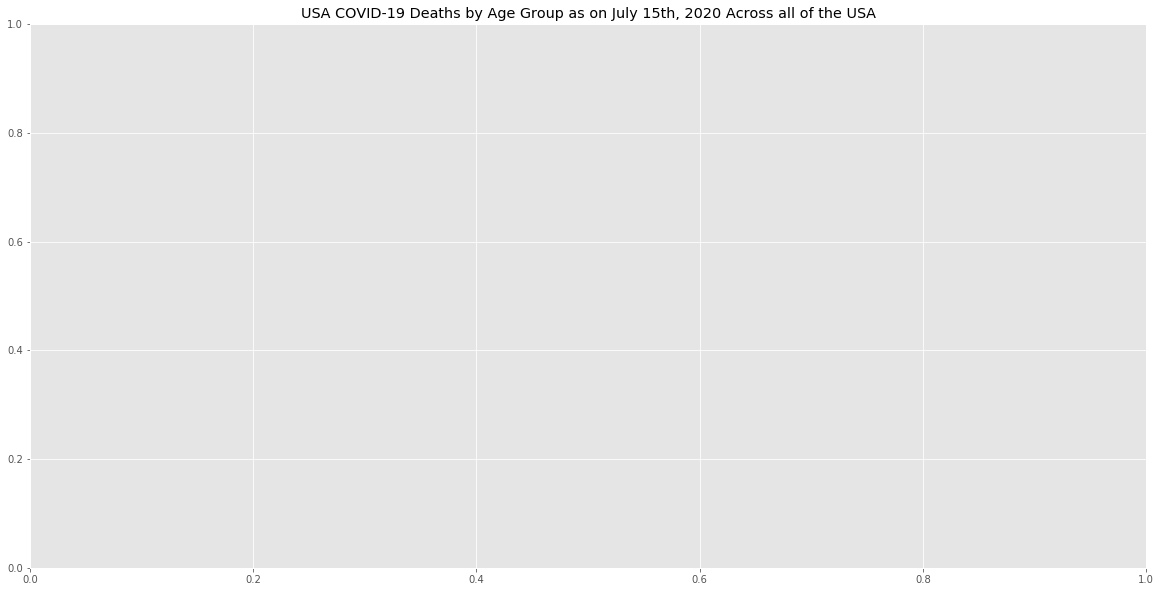

In [100]:
# Plot absolute values
# df_death_agegroup_pop = df_death_agegroup_pop.sort_values(['COVID-19 Deaths'], \
#                                                         ascending=False)

# plot_bar("USA COVID-19 Deaths by Age Group as on July 15th, 2020", \
#          "Across all of the USA", \
#          "Deaths", \
#          df_death_agegroup_pop['Age Group'], \
#          df_death_agegroup_pop['Age Group'], \
#          df_death_agegroup_pop['COVID-19 Deaths'], \
#          'df_death_agegroup_pop', \
#          80)

fig, ax = plt.subplots(figsize=(20,10))
ax.set_title("USA COVID-19 Deaths by Age Group as on July 15th, 2020 Across all of the USA")
ax.set_xlabel(df_death_agegroup_pop['Age Group'])
ax.set_ylabel(df_death_agegroup_pop.sort_values(['COVID-19 Deaths']))

#ax.set_xticks(len(df_death_so_State.index))
ax.set_xticklabels(df_death_agegroup_pop.index) # df_death_so_State.index)
ax.tick_params(axis='x', rotation=80)
_ = ax.bar(df_death_agegroup_pop[df_death_agegroup_pop['Age Group'], df_death_agegroup_pop['COVID-19 Deaths']])
    
plt.savefig(path + '/Images/' + figname)

In [101]:
# Show all the numbers
df_death_agegroup_pop

,Age Group,COVID-19 Deaths,Pneumonia Deaths,Influenza Deaths,Population
9,85 years and over,39762.0,40567.0,1110.0,6544503.0
8,75-84 years,31681.0,35492.0,1210.0,15394374.0
7,65-74 years,24869.0,27840.0,1130.0,30492316.0
6,55-64 years,14301.0,16023.0,942.0,42272636.0
4,45-54 years,5613.0,5616.0,267.0,41631699.0
3,35-44 years,1809.0,1912.0,33.0,41277888.0
2,25-34 years,566.0,674.0,0.0,45697774.0
1,15-24 years,25.0,50.0,0.0,42970800.0
0,1-4 years,0.0,0.0,0.0,15962067.0
5,5-14 years,0.0,0.0,0.0,41075169.0


## Hypotheses I am considering:

### 1. Null Hypothesis: No race groups have a higher fatality from COVID than others: blacks vs whites, hispanics vs whites, hispanics vs blacks 

### 2. Null Hypothesis: Older people have the same fatality rates to COVID, Pneumonia and Influenza

### 3. Null Hypothesis: There is a strong correlation between COVID deaths and Pneumonia deaths
### 3(b) Null Hypothesis: There is a strong correlation between COVID deaths and Influenza deaths





#### 1.1 Consider only Age Group 85+ per State

In [577]:
# Read in the cleaned deaths, deaths per million by state by age group data
df_death_state_agegroup_pop = \
    pd.read_csv(path + '/Data/OutputData/df_death_state_agegroup_pop.csv')
df_death_state_agegroup_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   State                         561 non-null    object 
 1   COVID-19 Deaths               561 non-null    float64
 2   Pneumonia Deaths              561 non-null    float64
 3   Influenza Deaths              561 non-null    float64
 4   Age Group                     561 non-null    object 
 5   Population                    561 non-null    float64
 6   COVID-19 Deaths per Million   561 non-null    float64
 7   Pneumonia Deaths per Million  561 non-null    float64
 8   Influenza Deaths per Million  561 non-null    float64
dtypes: float64(7), object(2)
memory usage: 39.6+ KB


In [578]:
# Drop all other age groups
df_85_plus = df_death_state_agegroup_pop[df_death_state_agegroup_pop['Age Group'] == \
                                        '85 years and over'] \
                    .reset_index() \
                    .drop(columns = ['index']) \
                    .sort_values(['COVID-19 Deaths per Million'], ascending=False)

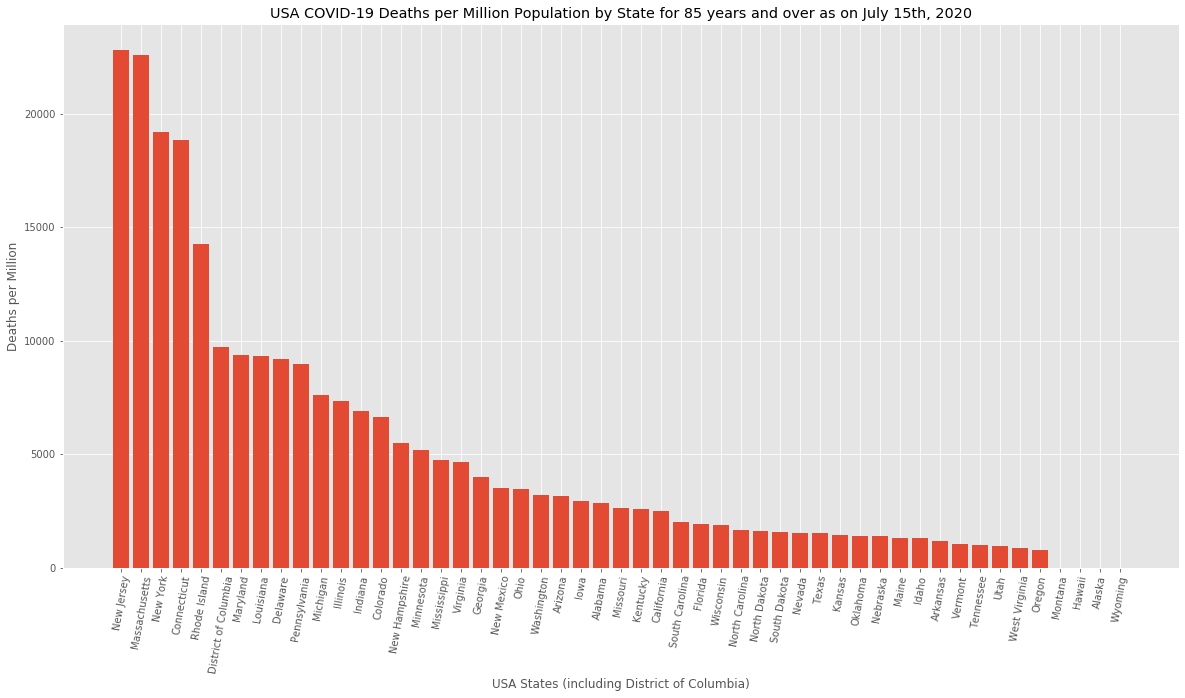

In [579]:
# Plot 85+ deaths per million across states
plot_bar("USA COVID-19 Deaths per Million Population by State for 85 years and over as on July 15th, 2020", \
         "USA States (including District of Columbia)", \
         "Deaths per Million", \
         df_85_plus['State'], \
         df_85_plus['State'], \
         df_85_plus['COVID-19 Deaths per Million'], \
         'df_85_plus', \
         80)


#### 1.2 Consider only Age Group 75-84 per State

In [580]:
# Read in the cleaned deaths, deaths per million by state by age group data
df_death_state_agegroup_pop = \
    pd.read_csv(path + '/Data/OutputData/df_death_state_agegroup_pop.csv')
df_death_state_agegroup_pop.head()

,State,COVID-19 Deaths,Pneumonia Deaths,Influenza Deaths,Age Group,Population,COVID-19 Deaths per Million,Pneumonia Deaths per Million,Influenza Deaths per Million
0,Alabama,0.0,0.0,0.0,1-4 years,236464.0,0.00,0.00,0.0
1,Alabama,0.0,0.0,0.0,15-24 years,640900.0,0.00,0.00,0.0
2,Alabama,0.0,0.0,0.0,25-34 years,643540.0,0.00,0.00,0.0
3,Alabama,16.0,40.0,0.0,35-44 years,592302.0,27.01,67.53,0.0
4,Alabama,69.0,74.0,0.0,45-54 years,627458.0,109.97,117.94,0.0


In [581]:
# Drop all other age groups
df_75_84 = df_death_state_agegroup_pop[df_death_state_agegroup_pop['Age Group'] == \
                                        '75-84 years'] \
                    .reset_index() \
                    .drop(columns = ['index']) \
                    .sort_values(['COVID-19 Deaths per Million'], ascending=False)

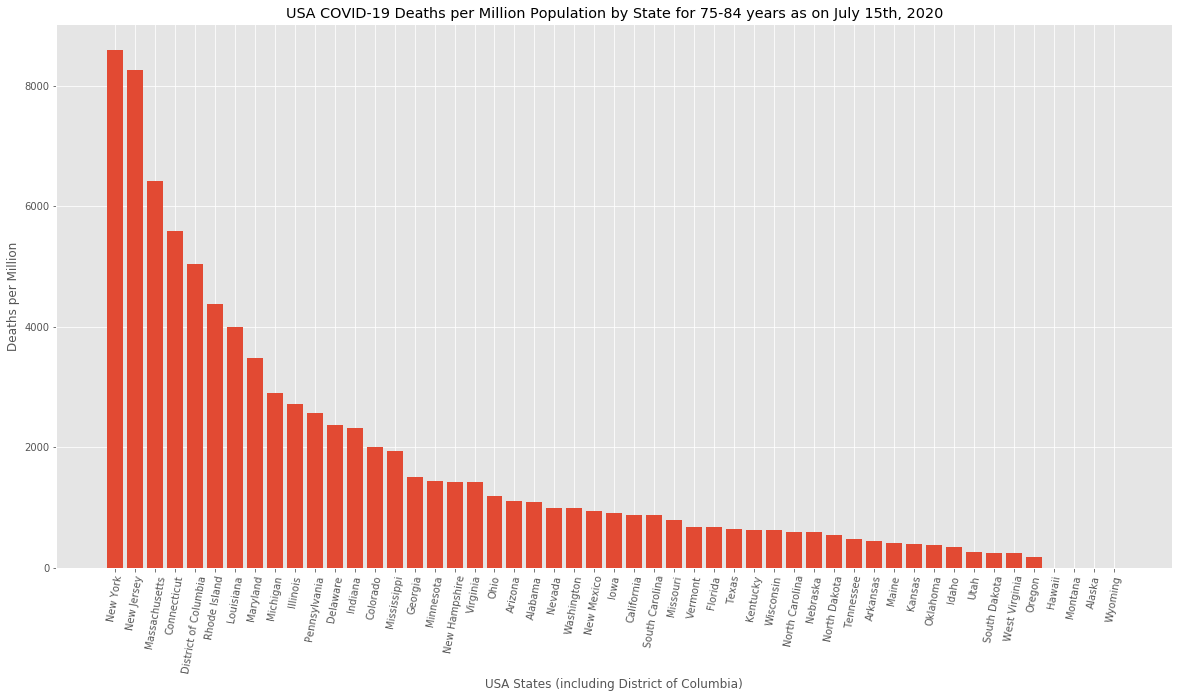

In [582]:
# Plot 75-84 deaths per million across states
plot_bar("USA COVID-19 Deaths per Million Population by State for 75-84 years as on July 15th, 2020", \
         "USA States (including District of Columbia)", \
         "Deaths per Million", \
         df_75_84['State'], \
         df_75_84['State'], \
         df_75_84['COVID-19 Deaths per Million'], \
         'df_75_84', \
         80)


#### 1.3 Consider only Age Group 65-74 per State

In [424]:
# Read in the cleaned deaths, deaths per million by state by age group data
df_death_state_agegroup_pop = \
    pd.read_csv(path + '/Data/OutputData/df_death_state_agegroup_pop.csv')
df_death_state_agegroup_pop.head()

,State,COVID-19 Deaths,Pneumonia Deaths,Influenza Deaths,Age Group,Population,COVID-19 Deaths per Million,Pneumonia Deaths per Million,Influenza Deaths per Million
0,Alabama,0.0,0.0,0.0,1-4 years,236464.0,0.00,0.00,0.0
1,Alabama,0.0,0.0,0.0,15-24 years,640900.0,0.00,0.00,0.0
2,Alabama,0.0,0.0,0.0,25-34 years,643540.0,0.00,0.00,0.0
3,Alabama,16.0,40.0,0.0,35-44 years,592302.0,27.01,67.53,0.0
4,Alabama,69.0,74.0,0.0,45-54 years,627458.0,109.97,117.94,0.0


In [425]:
# Drop all other age groups
df_65_74 = df_death_state_agegroup_pop[df_death_state_agegroup_pop['Age Group'] == \
                                        '65-74 years'] \
                    .reset_index() \
                    .drop(columns = ['index']) \
                    .sort_values(['COVID-19 Deaths per Million'], ascending=False)

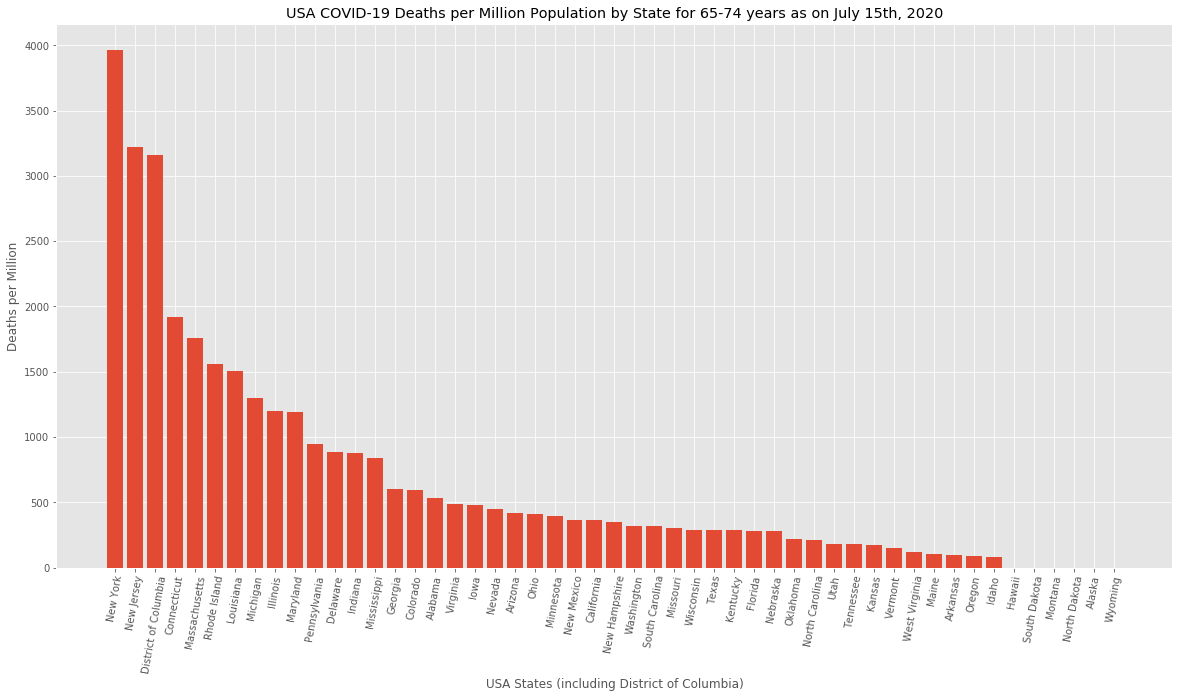

In [583]:
# Plot 65-74 deaths per million across states
plot_bar("USA COVID-19 Deaths per Million Population by State for 65-74 years as on July 15th, 2020", \
         "USA States (including District of Columbia)", \
         "Deaths per Million", \
         df_65_74['State'], \
         df_65_74['State'], \
         df_65_74['COVID-19 Deaths per Million'], \
         'df_65_74', \
         80)


#### 1.4 Consider only Age Group 55-64 per State

In [584]:
# Read in the cleaned deaths, deaths per million by state by age group data
df_death_state_agegroup_pop = \
    pd.read_csv(path + '/Data/OutputData/df_death_state_agegroup_pop.csv')
df_death_state_agegroup_pop.head()

,State,COVID-19 Deaths,Pneumonia Deaths,Influenza Deaths,Age Group,Population,COVID-19 Deaths per Million,Pneumonia Deaths per Million,Influenza Deaths per Million
0,Alabama,0.0,0.0,0.0,1-4 years,236464.0,0.00,0.00,0.0
1,Alabama,0.0,0.0,0.0,15-24 years,640900.0,0.00,0.00,0.0
2,Alabama,0.0,0.0,0.0,25-34 years,643540.0,0.00,0.00,0.0
3,Alabama,16.0,40.0,0.0,35-44 years,592302.0,27.01,67.53,0.0
4,Alabama,69.0,74.0,0.0,45-54 years,627458.0,109.97,117.94,0.0


In [585]:
# Drop all other age groups
df_55_64 = df_death_state_agegroup_pop[df_death_state_agegroup_pop['Age Group'] == \
                                        '55-64 years'] \
                    .reset_index() \
                    .drop(columns = ['index']) \
                    .sort_values(['COVID-19 Deaths per Million'], ascending=False)

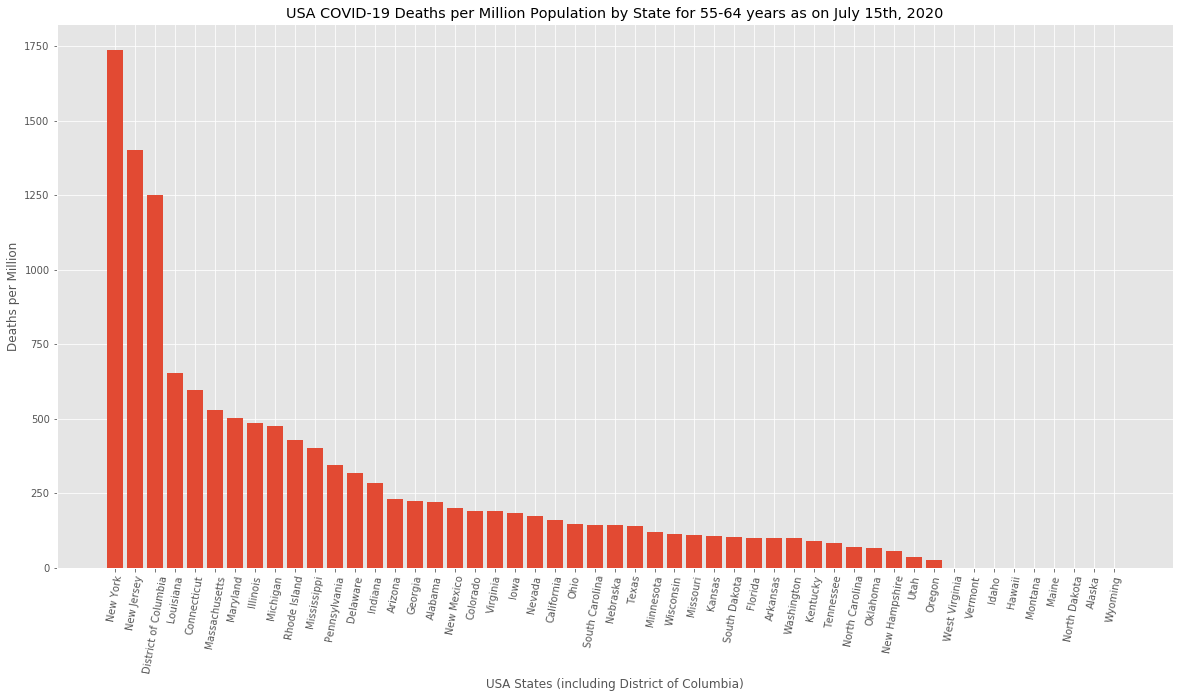

In [586]:
# Plot 55-64 deaths per million across states
plot_bar("USA COVID-19 Deaths per Million Population by State for 55-64 years as on July 15th, 2020", \
         "USA States (including District of Columbia)", \
         "Deaths per Million", \
         df_55_64['State'], \
         df_55_64['State'], \
         df_55_64['COVID-19 Deaths per Million'], \
         'df_55_64', \
         80)


#### 1.5 Consider only Age Group 45-54 per State

In [587]:
# Read in the cleaned deaths, deaths per million by state by age group data
df_death_state_agegroup_pop = \
    pd.read_csv(path + '/Data/OutputData/df_death_state_agegroup_pop.csv')
df_death_state_agegroup_pop.head()

,State,COVID-19 Deaths,Pneumonia Deaths,Influenza Deaths,Age Group,Population,COVID-19 Deaths per Million,Pneumonia Deaths per Million,Influenza Deaths per Million
0,Alabama,0.0,0.0,0.0,1-4 years,236464.0,0.00,0.00,0.0
1,Alabama,0.0,0.0,0.0,15-24 years,640900.0,0.00,0.00,0.0
2,Alabama,0.0,0.0,0.0,25-34 years,643540.0,0.00,0.00,0.0
3,Alabama,16.0,40.0,0.0,35-44 years,592302.0,27.01,67.53,0.0
4,Alabama,69.0,74.0,0.0,45-54 years,627458.0,109.97,117.94,0.0


In [588]:
# Drop all other age groups
df_45_54 = df_death_state_agegroup_pop[df_death_state_agegroup_pop['Age Group'] == \
                                        '45-54 years'] \
                    .reset_index() \
                    .drop(columns = ['index']) \
                    .sort_values(['COVID-19 Deaths per Million'], ascending=False)

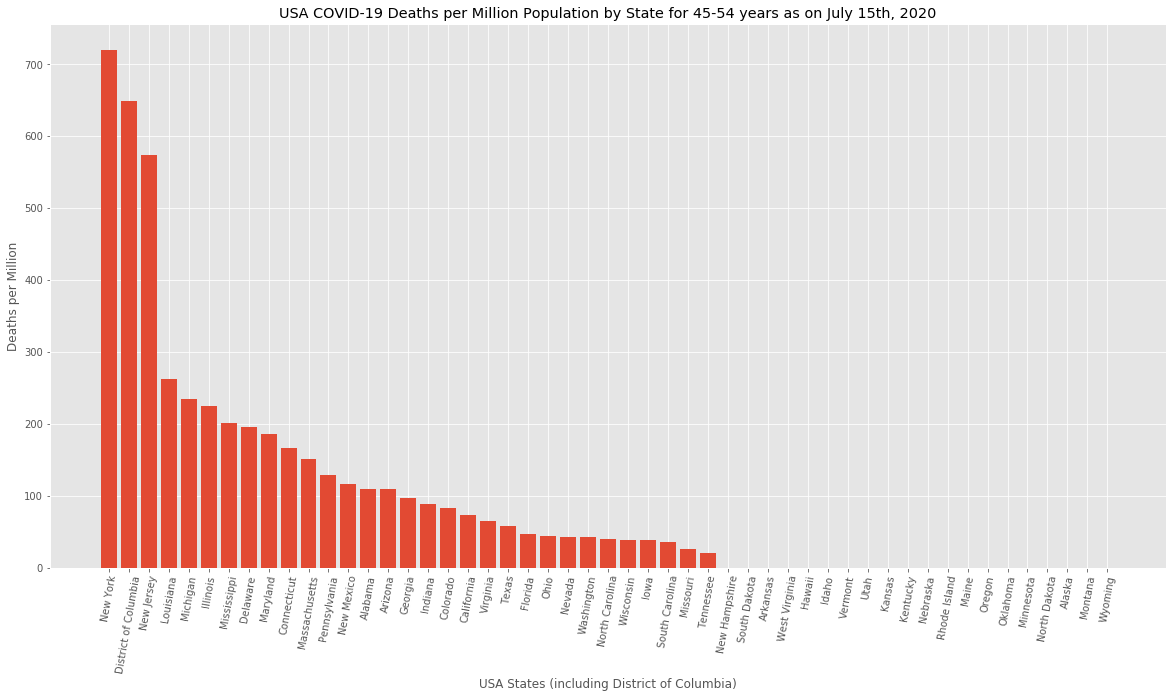

In [590]:
# Plot 45-54 deaths per million across states
plot_bar("USA COVID-19 Deaths per Million Population by State for 45-54 years as on July 15th, 2020", \
         "USA States (including District of Columbia)", \
         "Deaths per Million", \
         df_45_54['State'], \
         df_45_54['State'], \
         df_45_54['COVID-19 Deaths per Million'], \
         'df_45_54', \
         80)


#### 1.6 Consider only Age Group 35-44 per State

In [591]:
# Read in the cleaned deaths, deaths per million by state by age group data
df_death_state_agegroup_pop = \
    pd.read_csv(path + '/Data/OutputData/df_death_state_agegroup_pop.csv')
df_death_state_agegroup_pop.head()

,State,COVID-19 Deaths,Pneumonia Deaths,Influenza Deaths,Age Group,Population,COVID-19 Deaths per Million,Pneumonia Deaths per Million,Influenza Deaths per Million
0,Alabama,0.0,0.0,0.0,1-4 years,236464.0,0.00,0.00,0.0
1,Alabama,0.0,0.0,0.0,15-24 years,640900.0,0.00,0.00,0.0
2,Alabama,0.0,0.0,0.0,25-34 years,643540.0,0.00,0.00,0.0
3,Alabama,16.0,40.0,0.0,35-44 years,592302.0,27.01,67.53,0.0
4,Alabama,69.0,74.0,0.0,45-54 years,627458.0,109.97,117.94,0.0


In [592]:
# Drop all other age groups
df_35_44 = df_death_state_agegroup_pop[df_death_state_agegroup_pop['Age Group'] == \
                                        '35-44 years'] \
                    .reset_index() \
                    .drop(columns = ['index']) \
                    .sort_values(['COVID-19 Deaths per Million'], ascending=False)

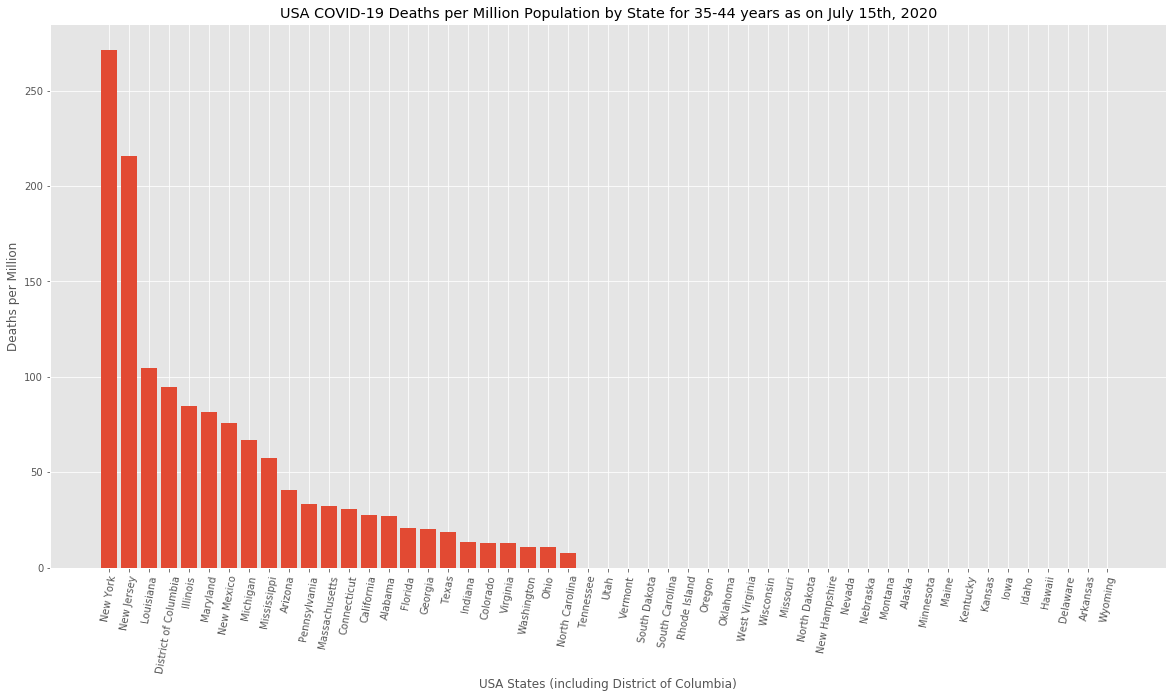

In [593]:
# Plot 35-44 deaths per million across states
plot_bar("USA COVID-19 Deaths per Million Population by State for 35-44 years as on July 15th, 2020", \
         "USA States (including District of Columbia)", \
         "Deaths per Million", \
         df_35_44['State'], \
         df_35_44['State'], \
         df_35_44['COVID-19 Deaths per Million'], \
         'df_35_44', \
         80)


#### 1.7 Consider only Age Group 25-34 per State

In [594]:
# Read in the cleaned deaths, deaths per million by state by age group data
df_death_state_agegroup_pop = \
    pd.read_csv(path + '/Data/OutputData/df_death_state_agegroup_pop.csv')
df_death_state_agegroup_pop.head()

,State,COVID-19 Deaths,Pneumonia Deaths,Influenza Deaths,Age Group,Population,COVID-19 Deaths per Million,Pneumonia Deaths per Million,Influenza Deaths per Million
0,Alabama,0.0,0.0,0.0,1-4 years,236464.0,0.00,0.00,0.0
1,Alabama,0.0,0.0,0.0,15-24 years,640900.0,0.00,0.00,0.0
2,Alabama,0.0,0.0,0.0,25-34 years,643540.0,0.00,0.00,0.0
3,Alabama,16.0,40.0,0.0,35-44 years,592302.0,27.01,67.53,0.0
4,Alabama,69.0,74.0,0.0,45-54 years,627458.0,109.97,117.94,0.0


In [595]:
# Drop all other age groups
df_25_34 = df_death_state_agegroup_pop[df_death_state_agegroup_pop['Age Group'] == \
                                        '25-34 years'] \
                    .reset_index() \
                    .drop(columns = ['index']) \
                    .sort_values(['COVID-19 Deaths per Million'], ascending=False)

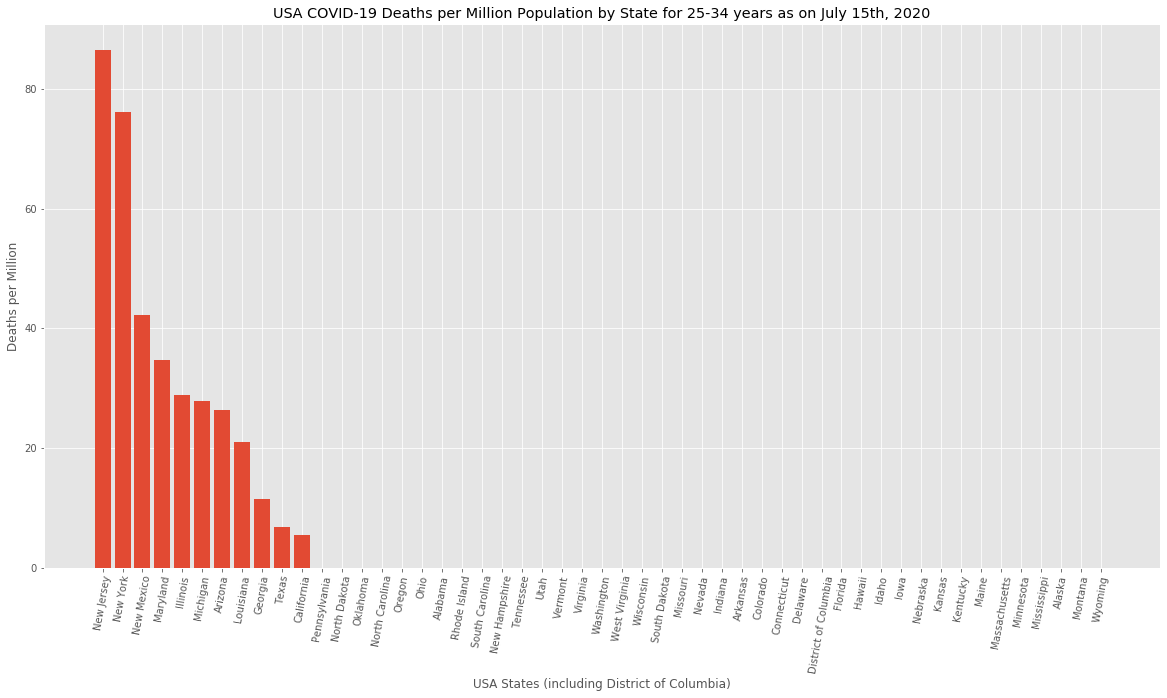

In [596]:
# Plot 25-34 deaths per million across states
plot_bar("USA COVID-19 Deaths per Million Population by State for 25-34 years as on July 15th, 2020", \
         "USA States (including District of Columbia)", \
         "Deaths per Million", \
         df_25_34['State'], \
         df_25_34['State'], \
         df_25_34['COVID-19 Deaths per Million'], \
         'df_25_34', \
         80)


#### 1.8 Consider only Age Group 15-24 per State

In [597]:
# Read in the cleaned deaths, deaths per million by state by age group data
df_death_state_agegroup_pop = \
    pd.read_csv(path + '/Data/OutputData/df_death_state_agegroup_pop.csv')
df_death_state_agegroup_pop.head()

,State,COVID-19 Deaths,Pneumonia Deaths,Influenza Deaths,Age Group,Population,COVID-19 Deaths per Million,Pneumonia Deaths per Million,Influenza Deaths per Million
0,Alabama,0.0,0.0,0.0,1-4 years,236464.0,0.00,0.00,0.0
1,Alabama,0.0,0.0,0.0,15-24 years,640900.0,0.00,0.00,0.0
2,Alabama,0.0,0.0,0.0,25-34 years,643540.0,0.00,0.00,0.0
3,Alabama,16.0,40.0,0.0,35-44 years,592302.0,27.01,67.53,0.0
4,Alabama,69.0,74.0,0.0,45-54 years,627458.0,109.97,117.94,0.0


In [598]:
# Drop all other age groups
df_15_24 = df_death_state_agegroup_pop[df_death_state_agegroup_pop['Age Group'] == \
                                        '15-24 years'] \
                    .reset_index() \
                    .drop(columns = ['index']) \
                    .sort_values(['COVID-19 Deaths per Million'], ascending=False)

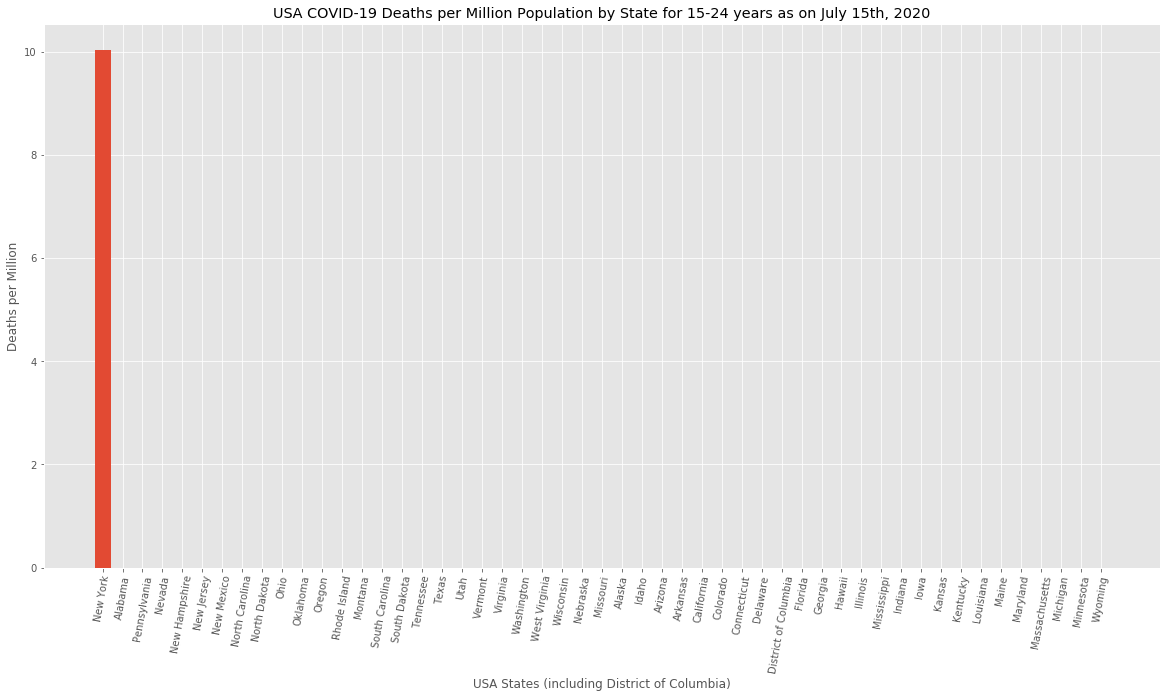

In [599]:
# Plot 15-24 deaths per million across states
plot_bar("USA COVID-19 Deaths per Million Population by State for 15-24 years as on July 15th, 2020", \
         "USA States (including District of Columbia)", \
         "Deaths per Million", \
         df_15_24['State'], \
         df_15_24['State'], \
         df_15_24['COVID-19 Deaths per Million'], \
         'df_15_24', \
         80)


#### 1.9 Consider only Age Group 5-14 per State

In [600]:
# Read in the cleaned deaths, deaths per million by state by age group data
df_death_state_agegroup_pop = \
    pd.read_csv(path + '/Data/OutputData/df_death_state_agegroup_pop.csv')
df_death_state_agegroup_pop.head(10)

,State,COVID-19 Deaths,Pneumonia Deaths,Influenza Deaths,Age Group,Population,COVID-19 Deaths per Million,Pneumonia Deaths per Million,Influenza Deaths per Million
0,Alabama,0.0,0.0,0.0,1-4 years,236464.0,0.00,0.00,0.00
1,Alabama,0.0,0.0,0.0,15-24 years,640900.0,0.00,0.00,0.00
2,Alabama,0.0,0.0,0.0,25-34 years,643540.0,0.00,0.00,0.00
3,Alabama,16.0,40.0,0.0,35-44 years,592302.0,27.01,67.53,0.00
4,Alabama,69.0,74.0,0.0,45-54 years,627458.0,109.97,117.94,0.00
5,Alabama,0.0,0.0,0.0,5-14 years,608395.0,0.00,0.00,0.00
6,Alabama,144.0,272.0,17.0,55-64 years,655179.0,219.79,415.15,25.95
7,Alabama,258.0,373.0,17.0,65-74 years,487721.0,528.99,764.78,34.86
8,Alabama,273.0,463.0,11.0,75-84 years,249308.0,1095.03,1857.14,44.12
9,Alabama,254.0,371.0,0.0,85 years and over,89865.0,2826.46,4128.41,0.00


In [601]:
# Drop all other age groups
df_5_14 = df_death_state_agegroup_pop[df_death_state_agegroup_pop['Age Group'] == \
                                        '5-14 years'] \
                    .reset_index() \
                    .drop(columns = ['index']) \
                    .sort_values(['COVID-19 Deaths per Million'], ascending=False)

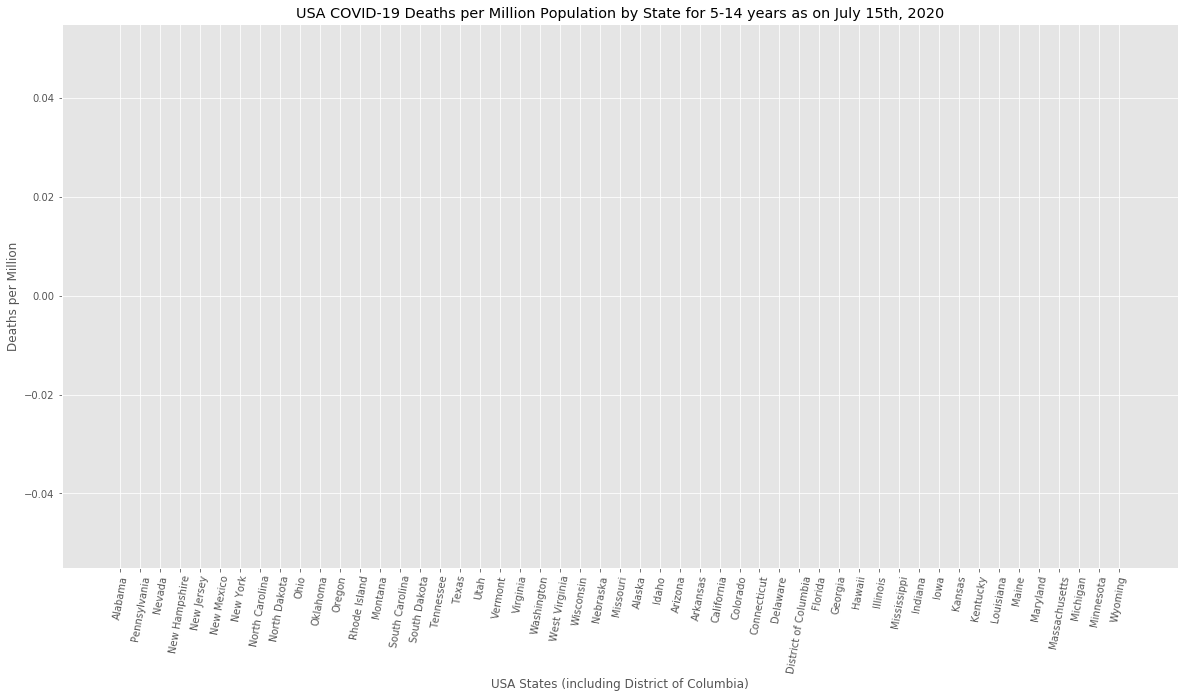

In [602]:
# Plot 5-14 deaths per million across states
plot_bar("USA COVID-19 Deaths per Million Population by State for 5-14 years as on July 15th, 2020", \
         "USA States (including District of Columbia)", \
         "Deaths per Million", \
         df_5_14['State'], \
         df_5_14['State'], \
         df_5_14['COVID-19 Deaths per Million'], \
         'df_5_14', \
         80)


#### 1.10 Consider only Age Group 1-4 per State

In [603]:
# Read in the cleaned deaths, deaths per million by state by age group data
df_death_state_agegroup_pop = \
    pd.read_csv(path + '/Data/OutputData/df_death_state_agegroup_pop.csv')
df_death_state_agegroup_pop.head(10)

,State,COVID-19 Deaths,Pneumonia Deaths,Influenza Deaths,Age Group,Population,COVID-19 Deaths per Million,Pneumonia Deaths per Million,Influenza Deaths per Million
0,Alabama,0.0,0.0,0.0,1-4 years,236464.0,0.00,0.00,0.00
1,Alabama,0.0,0.0,0.0,15-24 years,640900.0,0.00,0.00,0.00
2,Alabama,0.0,0.0,0.0,25-34 years,643540.0,0.00,0.00,0.00
3,Alabama,16.0,40.0,0.0,35-44 years,592302.0,27.01,67.53,0.00
4,Alabama,69.0,74.0,0.0,45-54 years,627458.0,109.97,117.94,0.00
5,Alabama,0.0,0.0,0.0,5-14 years,608395.0,0.00,0.00,0.00
6,Alabama,144.0,272.0,17.0,55-64 years,655179.0,219.79,415.15,25.95
7,Alabama,258.0,373.0,17.0,65-74 years,487721.0,528.99,764.78,34.86
8,Alabama,273.0,463.0,11.0,75-84 years,249308.0,1095.03,1857.14,44.12
9,Alabama,254.0,371.0,0.0,85 years and over,89865.0,2826.46,4128.41,0.00


In [604]:
# Drop all other age groups
df_1_4 = df_death_state_agegroup_pop[df_death_state_agegroup_pop['Age Group'] == \
                                        '1-4 years'] \
                    .reset_index() \
                    .drop(columns = ['index']) \
                    .sort_values(['COVID-19 Deaths per Million'], ascending=False)

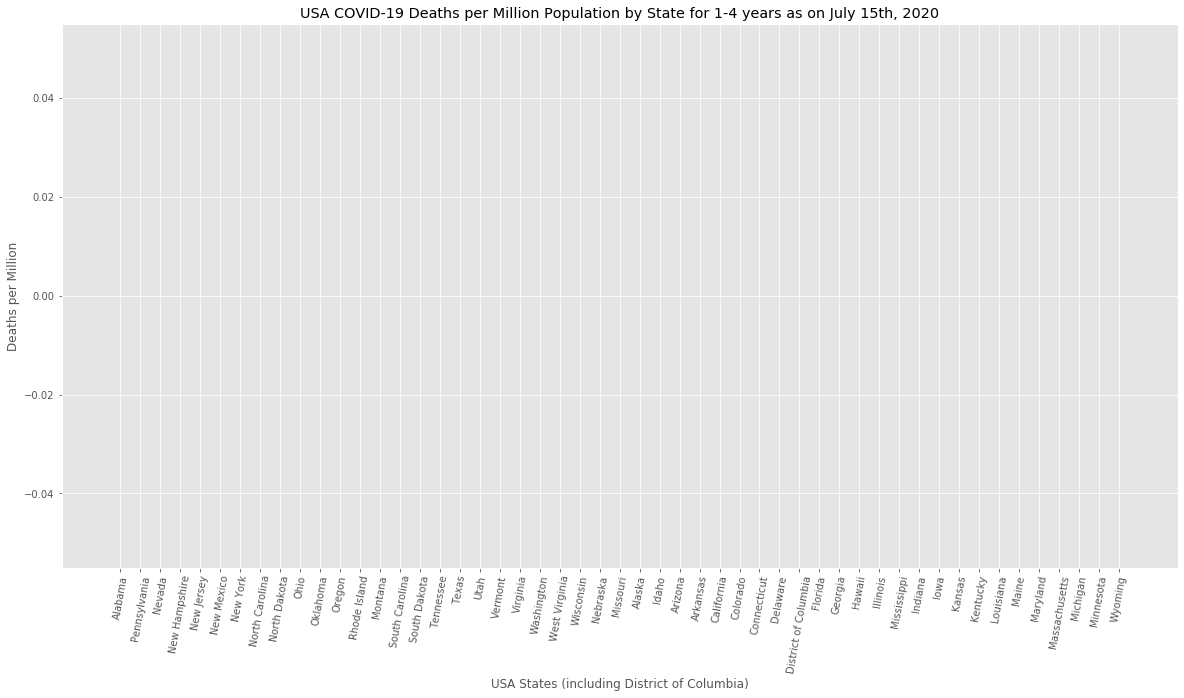

In [605]:
# Plot 1-4 deaths per million across states
plot_bar("USA COVID-19 Deaths per Million Population by State for 1-4 years as on July 15th, 2020", \
         "USA States (including District of Columbia)", \
         "Deaths per Million", \
         df_1_4['State'], \
         df_1_4['State'], \
         df_1_4['COVID-19 Deaths per Million'], \
         'df_1_4', \
         80)


#### 1.11 Consider only Age Group <1 per State

In [606]:
# Read in the cleaned deaths, deaths per million by state by age group data
df_death_state_agegroup_pop = \
    pd.read_csv(path + '/Data/OutputData/df_death_state_agegroup_pop.csv')
df_death_state_agegroup_pop.head(11)

,State,COVID-19 Deaths,Pneumonia Deaths,Influenza Deaths,Age Group,Population,COVID-19 Deaths per Million,Pneumonia Deaths per Million,Influenza Deaths per Million
0,Alabama,0.0,0.0,0.0,1-4 years,236464.0,0.00,0.00,0.00
1,Alabama,0.0,0.0,0.0,15-24 years,640900.0,0.00,0.00,0.00
2,Alabama,0.0,0.0,0.0,25-34 years,643540.0,0.00,0.00,0.00
3,Alabama,16.0,40.0,0.0,35-44 years,592302.0,27.01,67.53,0.00
4,Alabama,69.0,74.0,0.0,45-54 years,627458.0,109.97,117.94,0.00
5,Alabama,0.0,0.0,0.0,5-14 years,608395.0,0.00,0.00,0.00
6,Alabama,144.0,272.0,17.0,55-64 years,655179.0,219.79,415.15,25.95
7,Alabama,258.0,373.0,17.0,65-74 years,487721.0,528.99,764.78,34.86
8,Alabama,273.0,463.0,11.0,75-84 years,249308.0,1095.03,1857.14,44.12
9,Alabama,254.0,371.0,0.0,85 years and over,89865.0,2826.46,4128.41,0.00


In [607]:
# Drop all other age groups
df_1_minus = df_death_state_agegroup_pop[df_death_state_agegroup_pop['Age Group'] == \
                                        'Under 1 year'] \
                    .reset_index() \
                    .drop(columns = ['index']) \
                    .sort_values(['COVID-19 Deaths per Million'], ascending=False)

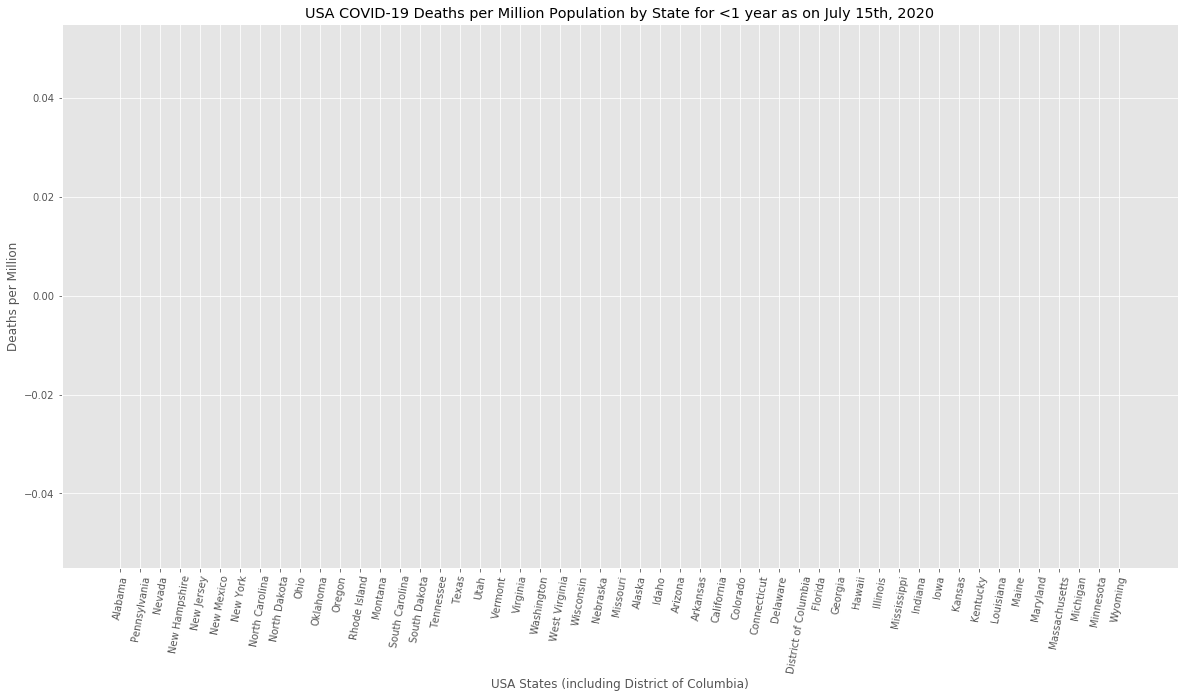

In [608]:
# Plot 1-4 deaths per million across states
plot_bar("USA COVID-19 Deaths per Million Population by State for <1 year as on July 15th, 2020", \
         "USA States (including District of Columbia)", \
         "Deaths per Million", \
         df_1_minus['State'], \
         df_1_minus['State'], \
         df_1_minus['COVID-19 Deaths per Million'], \
         'df_1_minus', \
         80)


# Null Hypotheses: 
$$ H_0 : \text{There is no difference in fatality rates between Non-Hispanic Blacks and Non-Hispanic Whites in the USA} $$
$$ z-test p-value = 0 : H_0 \text{ is roundly rejected!} $$

$$ H_0 : \text{There is no difference in COVID-19 fatality rates between Blacks and Whites in the USA} $$ 
$$ z-test  p-value = 0 : H_0 \text{ is roundly rejected!} $$

$$ H_0 : \text{There is no difference in COVID-19 fatality rates between Hispanics/LatinXs and Whites in the USA} $$
$$ z-test  p-value = 0 : H_0 \text{ is roundly rejected!} $$

$$ H_0 : \text{There is no difference in COVID-19 fatality rates between Blacks and Hispanics/Latinos in the USA} $$
$$ z-test  p-value = 0 : H_0 \text{ is roundly rejected!} $$

$$ H_0 : \text{There is no difference in COVID-19 fatality rates between Asians and American Indian/Alaskan Natives in the USA} $$
$$ z-test  p-value = ? : H_0 \text{ (results pending)} $$

$$ H_0 : \text{There is no difference between COVID-19 fatality rates between working age adults and seniors in the USA} $$
$$ z-test  p-value = 0 : H_0 \text{ is roundly rejected!} $$

### Read the Deaths per Million by State and Race from the csv file

In [29]:
df_death_state_eth_pop = pd.read_csv(path + '/Data/OutputData/df_death_state_eth_pop.csv')
# df_death_state_eth_pop.head()

In [30]:
# drop state
df_death_eth_pop = df_death_state_eth_pop.drop(columns=['State'])


# groupby eth groups across all states
df_death_eth_pop = df_death_eth_pop.groupby(df_death_eth_pop['Race and Hispanic Origin Group']).sum().reset_index()

In [31]:
# df_death_eth_pop.head(10)

### Plot Deaths and Deaths per Million by ethnicity/race groups

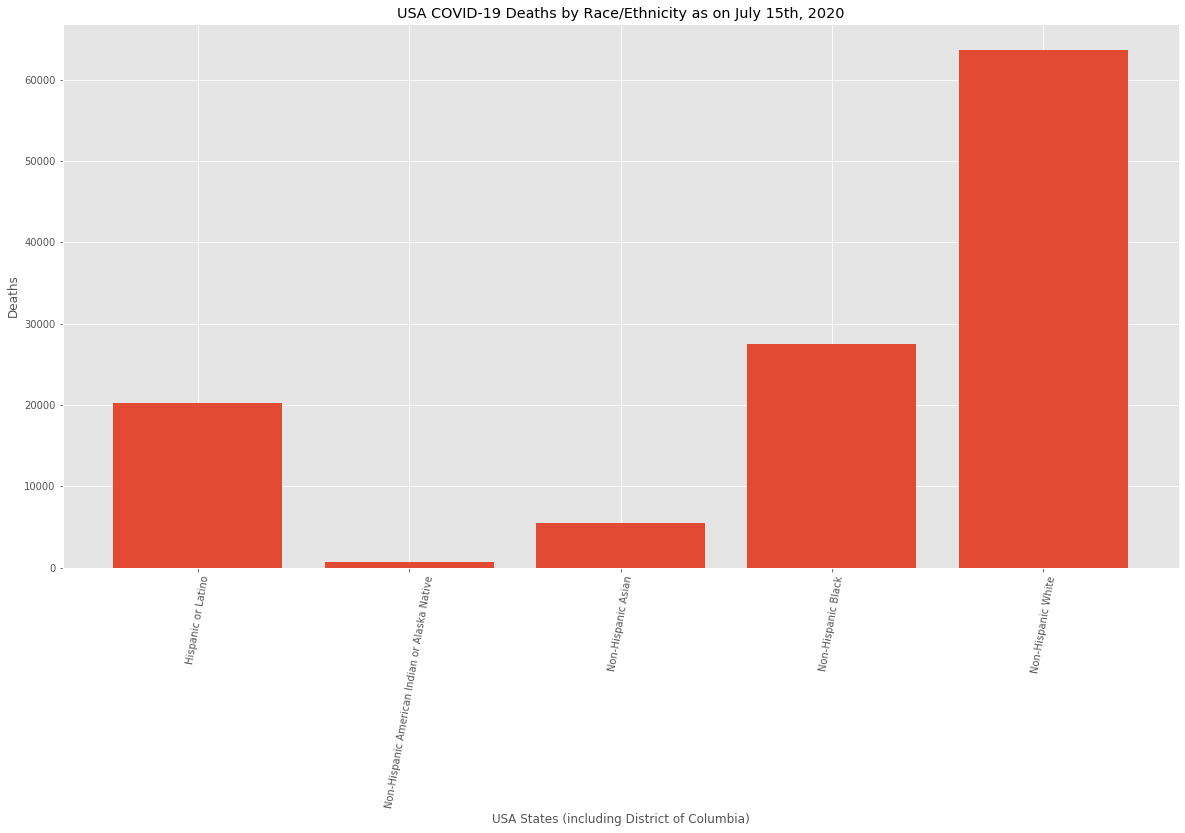

In [34]:
# Plot deaths across 'Race and Hispanic Origin Group'
plot_bar("USA COVID-19 Deaths by Race/Ethnicity as on July 15th, 2020", \
         "USA States (including District of Columbia)", \
         "Deaths", \
         df_death_eth_pop['Race and Hispanic Origin Group'], \
         df_death_eth_pop['Race and Hispanic Origin Group'], \
         df_death_eth_pop['COVID-19 Deaths'], \
         'df_death_eth_pop', \
         80)

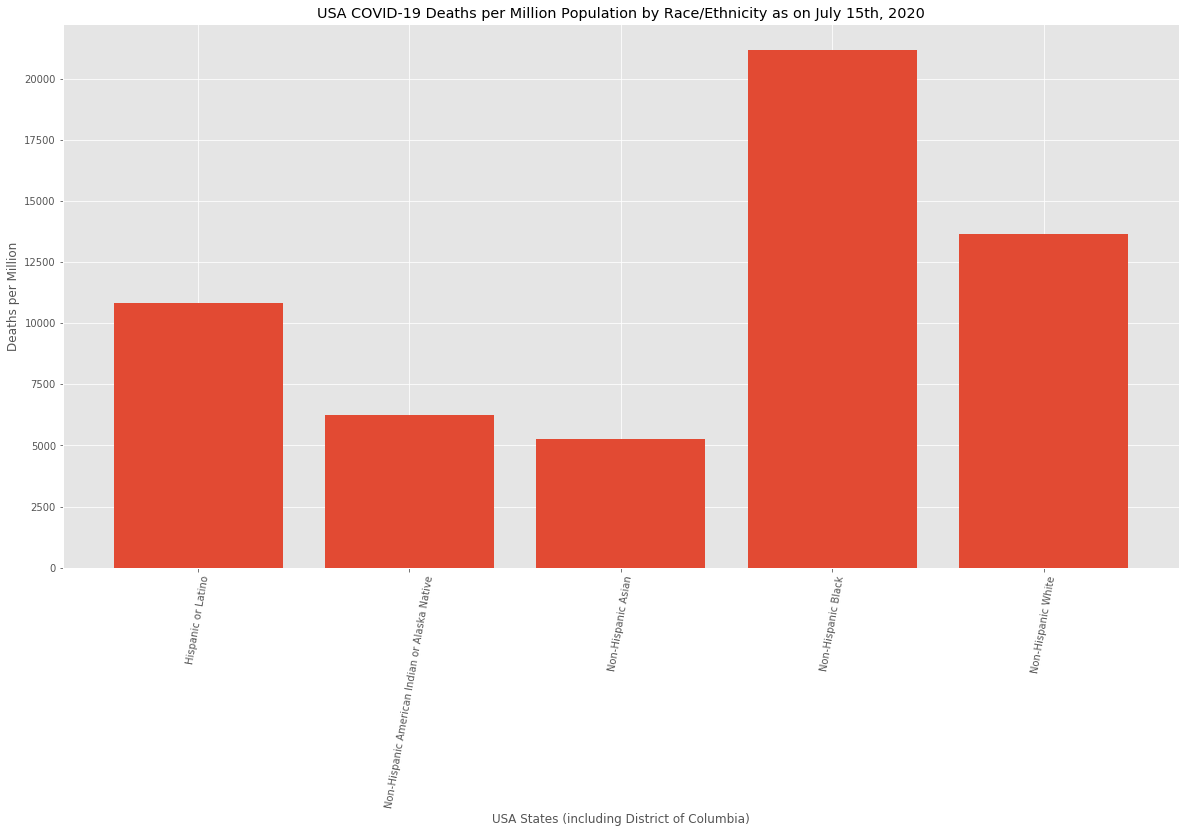

In [35]:
# Plot deaths per million across 'Race and Hispanic Origin Group'
plot_bar("USA COVID-19 Deaths per Million Population by Race/Ethnicity as on July 15th, 2020", \
         "USA States (including District of Columbia)", \
         "Deaths per Million", \
         df_death_eth_pop['Race and Hispanic Origin Group'], \
         df_death_eth_pop['Race and Hispanic Origin Group'], \
         df_death_eth_pop['COVID-19 Deaths per Million'], \
         'df_death_eth_pop_per_million', \
         80)

### Plot only Whites & Blacks

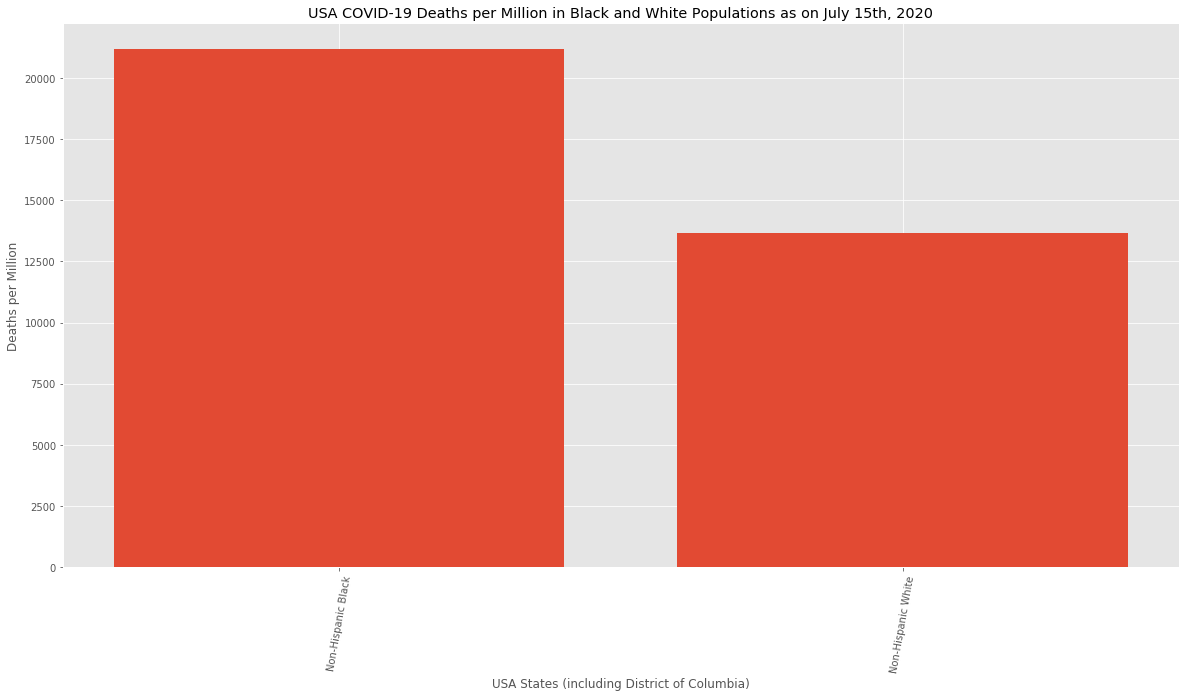

In [613]:
# Limit the dataframe to only whites & blacks
df_death_wb = df_death_eth_pop[df_death_eth_pop['Race and Hispanic Origin Group'] \
                 .isin(['Non-Hispanic Black', 'Non-Hispanic White'])]

# Plot deaths per million across 'Race and Hispanic Origin Group'
plot_bar("USA COVID-19 Deaths per Million in Black and White Populations as on July 15th, 2020", \
         "USA States (including District of Columbia)", \
         "Deaths per Million", \
         df_death_wb['Race and Hispanic Origin Group'], \
         df_death_wb['Race and Hispanic Origin Group'], \
         df_death_wb['COVID-19 Deaths per Million'], \
         'df_death_wb', \
         80)

### The Two Sample z-test (Approximate Test of Population Proportion)

#### Creating a Probablistic Model of the Stiuation Assuming the Null Hypothesis is True

Assuming that each death of a white person is independent of all the rest (with the same for black persons), the number of deaths of whites and blacks in a fixed population are Binomial distributed

$$ \text{# of White deaths} \sim Binomial(N_W, p_W) $$
$$ \text{# of Black deaths} \sim Binomial(N_B, p_B) $$

A Normal approximation is appropriate for each of these Binomial distributions

$$ \text{# of White fatalities} \approx Normal(N_Wp_W, \sqrt{N_Wp_W(1-p_W)}) $$
$$ \text{# of Black fatalities} \approx Normal(N_Bp_B, \sqrt{N_Bp_B(1-p_B)}) $$

Now let's normalize to put White fatalities and Black fatalities on equal footing, neccessary since the populations are different

$$ \text{Frequency of White fatalities} \approx Normal \left( p_W, \sqrt{\frac{p_W(1-p_W)}{N_W}} \right) $$
$$ \text{Frequency of Black fatalities} \approx Normal \left( p_B, \sqrt{\frac{p_B(1-p_B)}{N_B}} \right) $$

Finally, assuming that White fatalites are independent of Black fatalities, we get a probablistic model for the **difference in sample frequencies**

$$ \text{Difference in sample frequencies between Whites and Blacks} \approx Normal \left( p_W - p_B, \sqrt{\frac{p_B(1-p_B)}{N_B} + \frac{p_W(1-p_W)}{N_W}} \right) $$

#### The NULL Hypothesis
$$ N_W =  \text{Number of White persons in our sample} $$
$$ N_B =  \text{Number of Black persons in our sample} $$

$$ p_W = P(\text{White person fatality}) $$
$$ p_B = P(\text{Black person fatality}) $$

$$ H_0: \ p_W \leq p_B $$

Making this hypothesis maximally difficult to reject. The most conservative hypothesis is:

$$ H_0 : \ p_W = p_B \equiv p$$

Which makes our probabalistic model under the null reduce to

$$ \text{Difference in sample frequencies between Whites and Blacks} \approx Normal \left( 0, \sqrt{\frac{p(1-p)}{N_B} + \frac{p(1-p)}{N_B}} \right) $$

The last problem is that we **don't know the true frequencies $p_W$ and $p_B$, nor the assumend shared fequency p**, (if we did, we wouldn't need the statistical test).  Our only resort is to substitute an estimate of the shared value from the sample

$$ \text{Difference in sample frequencies between Whites and Blacks} \approx Normal \left( 0, \sqrt{\frac{ \hat p(1- \hat p)}{N_B} + \frac{ \hat p(1- \hat p)}{N_W}} \right) $$


$$ \approx Normal \left( 0, \sqrt{\frac{(N_W+N_B) \hat p(1- \hat p)}{N_W*N_B}} \right) $$


#### Get values for :
$$ N_W =  \text{Number of White persons in our sample} $$
$$ N_B =  \text{Number of Black persons in our sample} $$

$$ p_W = P(\text{White person fatality}) $$
$$ p_B = P(\text{Black person fatality}) $$

In [614]:
# Get number of Whites from Pop data
N_whites = list(df_death_eth_pop[df_death_eth_pop['Race and Hispanic Origin Group'] \
                                 == 'Non-Hispanic White']['Population'])[0]
N_whites

201068278.0

In [615]:
# Get number of Blacks from Pop data
N_blacks = list(df_death_eth_pop[df_death_eth_pop['Race and Hispanic Origin Group'] \
                                    == 'Non-Hispanic Black']['Population'])[0]
N_blacks

42934826.0

In [616]:
# Get number of White fatalities
k_whites = list(df_death_eth_pop[df_death_eth_pop['Race and Hispanic Origin Group'] \
                                 == 'Non-Hispanic White']['COVID-19 Deaths'])[0]
k_whites

63655.0

In [617]:
# Get number of Black fatalities
k_blacks = list(df_death_eth_pop[df_death_eth_pop['Race and Hispanic Origin Group'] \
                                    == 'Non-Hispanic Black']['COVID-19 Deaths'])[0]
k_blacks

27451.0

In [618]:
# Get frequency of White fatalities
p_whites = k_whites / N_whites
p_whites

0.00031658400138086424

In [619]:
# Get frequency of Black fatalities
p_blacks = k_blacks / N_blacks
p_blacks

0.0006393644171284169

#### Set up normal distribution of the difference in frequencies

$$ \approx Normal \left( 0, \sqrt{\frac{(N_W+N_B) \hat p(1- \hat p)}{N_W*N_B}} \right) $$

In [620]:
shared_sample_freq = (k_whites + k_blacks) \
                        / (N_whites + N_blacks)
shared_sample_variance \
= (N_whites + N_blacks) * (shared_sample_freq * (1 - shared_sample_freq)) / (N_whites * N_blacks)
dist_of_freq_diff = scs.norm(0, np.sqrt(shared_sample_variance))

In [621]:
print(f'Shared Sample Frequency = {shared_sample_freq}')
print(f'Shared Sample Variance = {shared_sample_variance}')

Shared Sample Frequency = 0.00037338049601205075
Shared Sample Variance = 1.054949149413168e-11


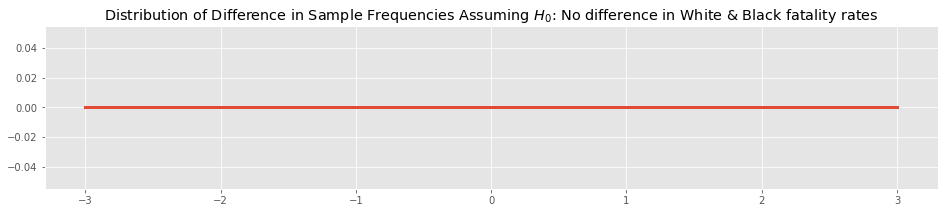

In [622]:
fig, ax = plt.subplots(1, figsize=(16, 3))

x = np.linspace(-3, 3, num=500)
_ = ax.plot(x, dist_of_freq_diff.pdf(x), linewidth=3)
# _ = ax.set_xlim(-1, 1)
_ = ax.set_title \
   ("Distribution of Difference in Sample Frequencies Assuming $H_0$: No difference in White & Black fatality rates")

In [623]:
print(dist_of_freq_diff.pdf(x))


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

#### Decide how suprised I need to be to reject the skeptical $H_0$

Let alpha be stringent: $\alpha = 0.02$

In [624]:
# Calculate the difference in sample freqencies
diff_in_sample_proportions = abs(p_whites - p_blacks)
print(diff_in_sample_proportions)

0.00032278041574755265


In [625]:
# Calculate p-value
p_value = 1 - dist_of_freq_diff.cdf(diff_in_sample_proportions)
print(f'p-value = {p_value}')

p-value = 0.0


Text(0.5, 1.0, 'p-value Region')

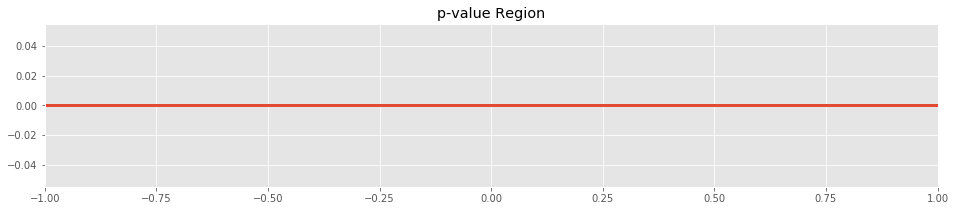

In [626]:
fig, ax = plt.subplots(1, figsize=(16, 3))

x = np.linspace(-1, 1, num=500)
ax.plot(x, dist_of_freq_diff.pdf(x), linewidth=3)
ax.fill_between(x, dist_of_freq_diff.pdf(x), where=(x >= diff_in_sample_proportions),
                color="red", alpha=0.5)
ax.set_xlim(-1, 1)
ax.set_title("p-value Region")

In [71]:
# The above proved to be fruitless as the numbers are too small
# So now we will do the z-test with the deaths per million numbers
N_blacks = 1000000
N_whites = 1000000
k_blacks_per_million = list(df_death_eth_pop[df_death_eth_pop['Race and Hispanic Origin Group'] \
                            == 'Non-Hispanic Black']['COVID-19 Deaths per Million'])[0] 
k_whites_per_million = list(df_death_eth_pop[df_death_eth_pop['Race and Hispanic Origin Group'] \
                            == 'Non-Hispanic White']['COVID-19 Deaths per Million'])[0] 

# from statsmodels.stats.proportion import proportions_ztest
count = np.array([k_blacks_per_million, k_whites_per_million])
nobs = np.array([N_blacks, N_whites])
stat, pval = proportions_ztest(count, nobs)
print('{0:0.3f}'.format(pval))
print(k_whites_per_million)
print(k_blacks_per_million)


0.000
13654.450000000006
21176.300000000003


In [628]:
df_death_eth_pop.head()

,Race and Hispanic Origin Group,COVID-19 Deaths,Pneumonia Deaths,Influenza Deaths,Population,COVID-19 Deaths per Million,Pneumonia Deaths per Million,Influenza Deaths per Million
0,Hispanic or Latino,20273.0,15961.0,551.0,59871746.0,10808.11,6987.42,101.85
1,Non-Hispanic American Indian or Alaska Native,666.0,646.0,0.0,2745839.0,6243.75,4225.51,0.00
2,Non-Hispanic Asian,5515.0,4957.0,149.0,20546745.0,5266.45,4088.75,70.10
3,Non-Hispanic Black,27451.0,21415.0,438.0,42934826.0,21176.30,16164.03,162.94
4,Non-Hispanic White,63655.0,84458.0,3554.0,201068278.0,13654.45,19206.80,686.04


# Null Hypothesis:

$$ \ H_0 \ : There is no difference in fatality rates between Hispanics and Non-Hispanic Whites in the USA $$

# Alternate Hypothesis:
## There IS a significant difference in fatality rates between Hispanics and Non-Hispanic Whites in the USA

### Read the Deaths per Million by State and Race from the csv file

In [56]:
df_death_state_eth_pop = pd.read_csv(path + '/Data/OutputData/df_death_state_eth_pop.csv')
# df_death_state_eth_pop.head()

In [57]:
# drop state
df_death_eth_pop = df_death_state_eth_pop.drop(columns=['State'])


# groupby eth groups across all states
df_death_eth_pop = df_death_eth_pop.groupby(df_death_eth_pop['Race and Hispanic Origin Group']).sum().reset_index()

In [58]:
# df_death_eth_pop.head(10)

### Plot Deaths by ethnicity/race groups

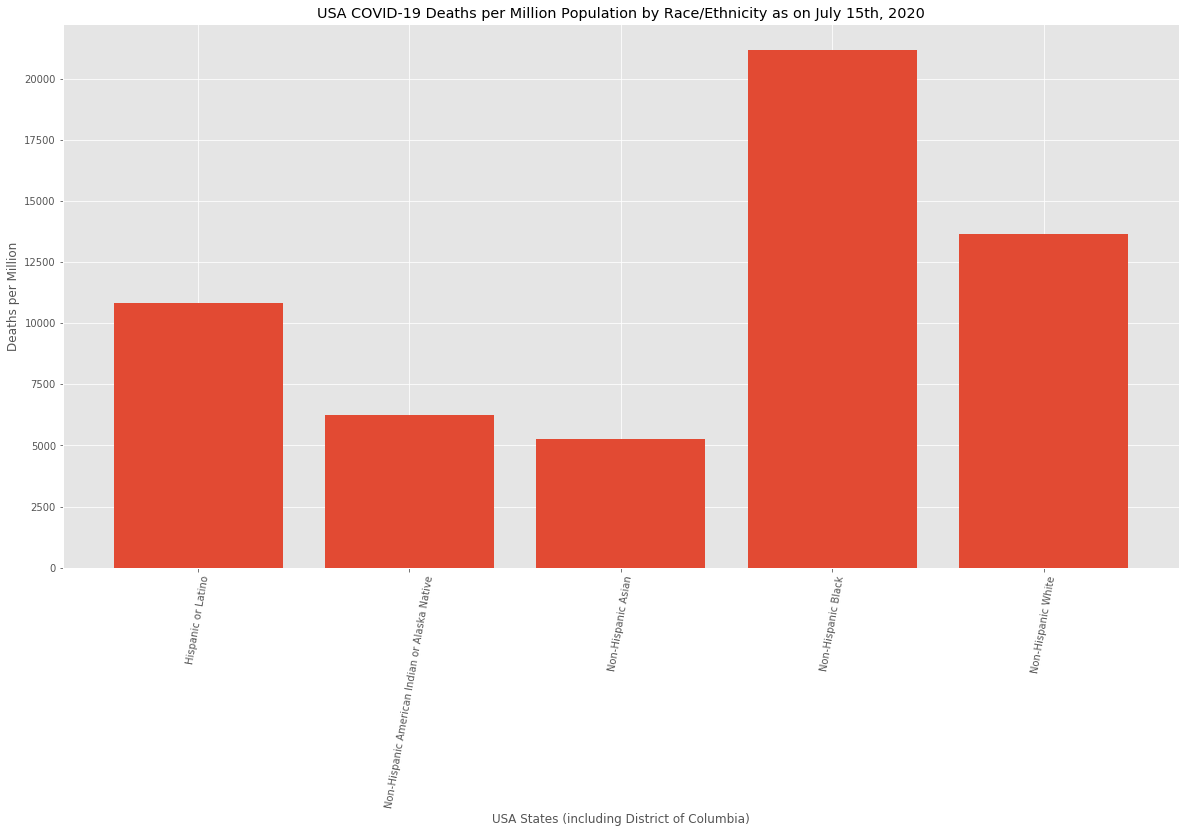

In [59]:
# Plot deaths per million across 'Race and Hispanic Origin Group'
plot_bar("USA COVID-19 Deaths per Million Population by Race/Ethnicity as on July 15th, 2020", \
         "USA States (including District of Columbia)", \
         "Deaths per Million", \
         df_death_eth_pop['Race and Hispanic Origin Group'], \
         df_death_eth_pop['Race and Hispanic Origin Group'], \
         df_death_eth_pop['COVID-19 Deaths per Million'], \
         'df_death_eth_pop', \
         80)

### Plot only Whites & Hispanics

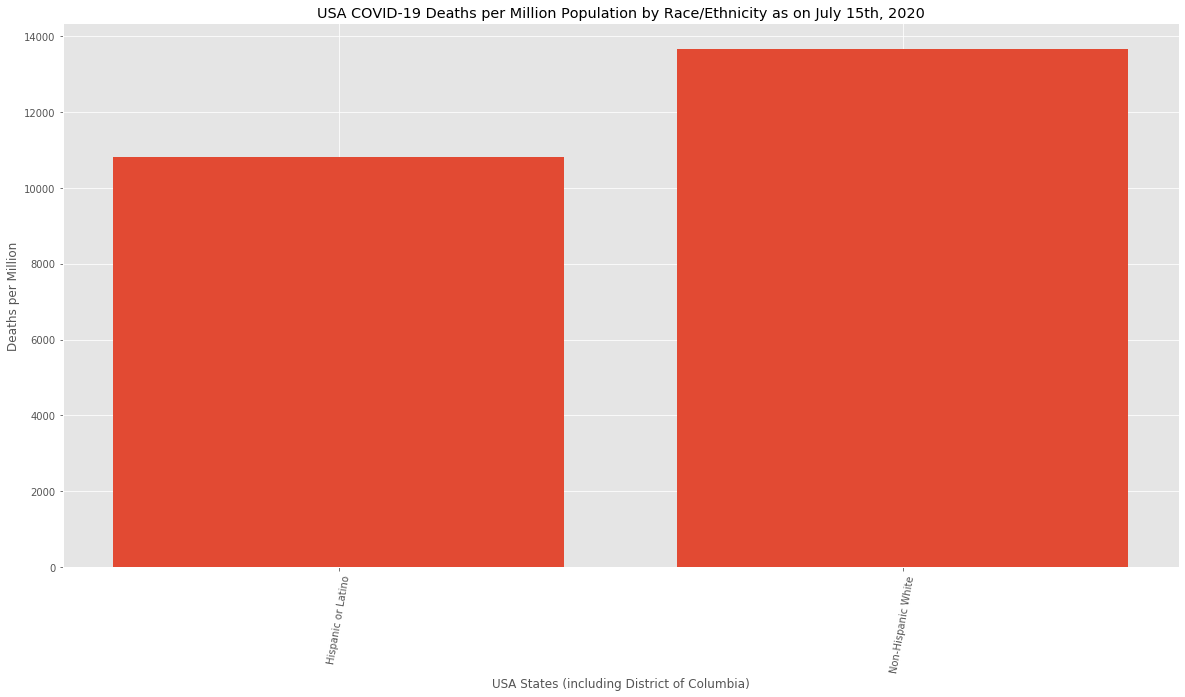

In [60]:
# Limit the dataframe to only whites & hispanics
df_death_wh = df_death_eth_pop[df_death_eth_pop['Race and Hispanic Origin Group'] \
                 .isin(['Hispanic or Latino', 'Non-Hispanic White'])]

# Plot deaths per million across 'Race and Hispanic Origin Group'
plot_bar("USA COVID-19 Deaths per Million Population by Race/Ethnicity as on July 15th, 2020", \
         "USA States (including District of Columbia)", \
         "Deaths per Million", \
         df_death_wh['Race and Hispanic Origin Group'], \
         df_death_wh['Race and Hispanic Origin Group'], \
         df_death_wh['COVID-19 Deaths per Million'], \
         'df_death_wh', \
         80)

### The Two Sample z-test (Approximate Test of Population Proportion)

#### Creating a Probablistic Model of the Stiuation Assuming the Null Hypothesis is True

Assuming that each death of a white person is independent of all the rest (with the same for hispanic persons), the number of deaths  of whites and hispanics in a fixed population are Binomial distributed

$$ \text{# of White deaths} \sim Binomial(N_W, p_W) $$
$$ \text{# of Hispanic deaths} \sim Binomial(N_H, p_H) $$

A Normal approximation is appropriate for each of these Binomial distributions

$$ \text{# of White fatalities} \approx Normal(N_Wp_W, \sqrt{N_Wp_W(1-p_W)}) $$
$$ \text{# of Hispanic fatalities} \approx Normal(N_Hp_H, \sqrt{N_Hp_H(1-p_H)}) $$

Now let's normalize to put White fatalities and Hispanic fatalities on equal footing, neccessary since the populations are different

$$ \text{Frequency of White fatalities} \approx Normal \left( p_W, \sqrt{\frac{p_W(1-p_W)}{N_W}} \right) $$
$$ \text{Frequency of Hispanic fatalities} \approx Normal \left( p_H, \sqrt{\frac{p_H(1-p_H)}{N_H}} \right) $$

Finally, assuming that White fatalites are independent of Hispanic fatalities, we get a probablistic model for the **difference in sample frequencies**

$$ \text{Difference in sample frequencies between Whites and Hispanics} \approx Normal \left( p_W - p_H, \sqrt{\frac{p_H(1-p_H)}{N_H} + \frac{p_W(1-p_W)}{N_W}} \right) $$

#### The NULL Hypothesis
$$ N_W =  \text{Number of White persons in our sample} $$
$$ N_H =  \text{Number of Hispanics in our sample} $$

$$ p_W = P(\text{White person fatality}) $$
$$ p_H = P(\text{Hispanic person fatality}) $$

$$ H_0: \ p_W \leq p_H $$

Making this hypothesis maximally difficult to reject. The most conservative hypothesis is:

$$ H_0 : \ p_W = p_H \equiv p$$

Which makes our probabalistic model under the null reduce to

$$ \text{Difference in sample frequencies between Whites and Hispanics} \approx Normal \left( 0, \sqrt{\frac{p(1-p)}{N_H} + \frac{p(1-p)}{N_W}} \right) $$

The last problem is that we **don't know the true frequencies $p_W$ and $p_H$, nor the assumend shared fequency p**, (if we did, we wouldn't need the statistical test).  Our only resort is to substitute an estimate of the shared value from the sample

$$ \text{Difference in sample frequencies between Whites and Hispanics} \approx Normal \left( 0, \sqrt{\frac{ \hat p(1- \hat p)}{N_H} + \frac{ \hat p(1- \hat p)}{N_W}} \right) $$


$$ \approx Normal \left( 0, \sqrt{\frac{(N_W+N_H) \hat p(1- \hat p)}{N_W*N_H}} \right) $$


#### Get values for :
$$ N_W =  \text{Number of White persons in our sample} $$
$$ N_H =  \text{Number of Hispanics in our sample} $$

$$ p_W = P(\text{White person fatality}) $$
$$ p_H = P(\text{Hispanic person fatality}) $$

In [81]:
# Get number of Whites from Pop data
N_whites = list(df_death_eth_pop[df_death_eth_pop['Race and Hispanic Origin Group'] \
                                 == 'Non-Hispanic White']['Population'])[0]
N_whites

201068278.0

In [82]:
# Get number of Hispanics from Pop data
N_hispanics = list(df_death_eth_pop[df_death_eth_pop['Race and Hispanic Origin Group'] \
                                    == 'Hispanic or Latino']['Population'])[0]
N_hispanics

59871746.0

In [83]:
# Get number of White fatalities
k_whites = list(df_death_eth_pop[df_death_eth_pop['Race and Hispanic Origin Group'] \
                                 == 'Non-Hispanic White']['COVID-19 Deaths'])[0]
k_whites

63655.0

In [78]:
# Get number of Hispanic fatalities
k_hispanics = list(df_death_eth_pop[df_death_eth_pop['Race and Hispanic Origin Group'] \
                                    == 'Hispanic or Latino']['COVID-19 Deaths'])[0]
k_hispanics

20273.0

In [84]:
# Get frequency of White fatalities
p_whites = k_whites / N_whites
p_whites


0.00031658400138086424

In [86]:
# Get frequency of Hispanic fatalities
p_hispanics = k_hispanics / N_hispanics
p_hispanics

0.0003386071286446198

#### Set up normal distribution of the difference in frequencies

$$ \approx Normal \left( 0, \sqrt{\frac{(N_W+N_H) \hat p(1- \hat p)}{N_W*N_H}} \right) $$

In [87]:
shared_sample_freq = (k_whites + k_hispanics) \
                        / (N_whites + N_hispanics)
print(shared_sample_freq)
shared_sample_variance \
= (N_whites + N_hispanics) * (shared_sample_freq * (1 - shared_sample_freq)) / (N_whites * N_hispanics)
print(shared_sample_variance)
dist_of_freq_diff = scs.norm(0, np.sqrt(shared_sample_variance))

0.00032163712838472033
6.969500994830926e-12


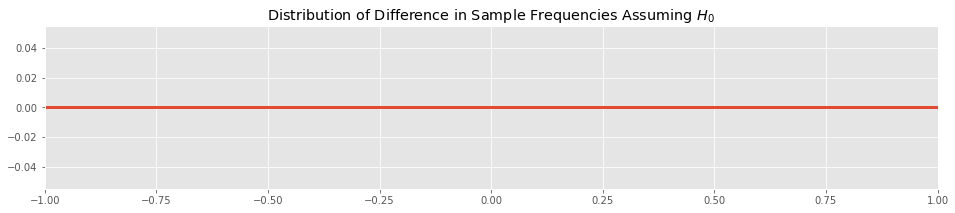

In [88]:
fig, ax = plt.subplots(1, figsize=(16, 3))

x = np.linspace(-1, 1, num=500)
_ = ax.plot(x, dist_of_freq_diff.pdf(x), linewidth=3)
_ = ax.set_xlim(-1, 1)
_ = ax.set_title \
   ("Distribution of Difference in Sample Frequencies Assuming $H_0$")

#### Decide how suprised I need to be to reject the skeptical $H_0$

Let alpha be stringent: $\alpha = 0.02$

In [89]:
# Calculate the difference in sample freqencies
diff_in_sample_proportions = abs(p_whites - p_hispanics)
print(diff_in_sample_proportions)

2.2023127263755553e-05


In [90]:
# Calculate p-value
p_value = 1 - dist_of_freq_diff.cdf(diff_in_sample_proportions)
print(f'p-value = {p_value}')

p-value = 0.0


Text(0.5, 1.0, 'p-value Region')

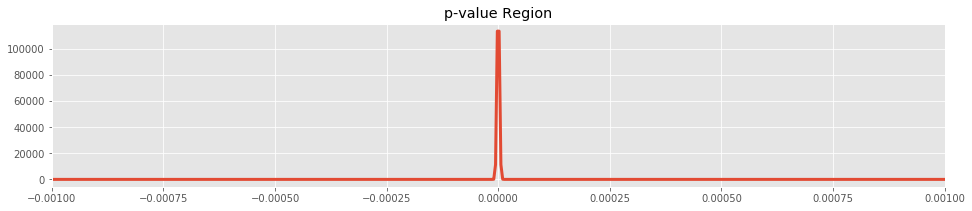

In [91]:
fig, ax = plt.subplots(1, figsize=(16, 3))

x = np.linspace(-0.001, 0.001, num=500)
ax.plot(x, dist_of_freq_diff.pdf(x), linewidth=3)
ax.fill_between(x, dist_of_freq_diff.pdf(x), where=(x >= diff_in_sample_proportions),
                color="red", alpha=0.5)
ax.set_xlim(-0.001, 0.001)
ax.set_title("p-value Region")

In [92]:
# The above proved to be fruitless as the numbers are too small
# So now we will do the z-test with the deaths per million numbers
N_hispanics = 1000000
N_whites = 1000000
k_hispanics_per_million = list(df_death_eth_pop[df_death_eth_pop['Race and Hispanic Origin Group'] \
                            == 'Hispanic or Latino']['COVID-19 Deaths per Million'])[0]
k_whites_per_million = list(df_death_eth_pop[df_death_eth_pop['Race and Hispanic Origin Group'] \
                            == 'Non-Hispanic White']['COVID-19 Deaths per Million'])[0]

# from statsmodels.stats.proportion import proportions_ztest
count = np.array([k_hispanics_per_million, k_whites_per_million])
nobs = np.array([N_hispanics, N_whites])
stat, pval = proportions_ztest(count, nobs)
print('{0:0.3f}'.format(pval))


0.000


In [646]:
# The above proved to be fruitless as the numbers are too small
# So now we will do the z-test with the deaths per million numbers
N_hispanics = 1000000
N_blacks = 1000000
k_hispanics_per_million = list(df_death_eth_pop[df_death_eth_pop['Race and Hispanic Origin Group'] \
                            == 'Hispanic or Latino']['COVID-19 Deaths per Million'])[0]
k_blacks_per_million = list(df_death_eth_pop[df_death_eth_pop['Race and Hispanic Origin Group'] \
                            == 'Non-Hispanic Black']['COVID-19 Deaths per Million'])[0]

# from statsmodels.stats.proportion import proportions_ztest
count = np.array([k_hispanics_per_million, k_blacks_per_million])
nobs = np.array([N_hispanics, N_blacks])
stat, pval = proportions_ztest(count, nobs)
print('{0:0.3f}'.format(pval))
print(k_hispanics_per_million)
print(k_whites_per_million)

0.000
10808.11
13654.450000000006


# Now let's look at Age Group questions

In [42]:
df_death_agegroup_pop.head(15)

,Age Group,COVID-19 Deaths,Pneumonia Deaths,Influenza Deaths,Population,COVID-19 Deaths per Million,Pneumonia Deaths per Million,Influenza Deaths per Million
9,85 years and over,39762.0,40567.0,1110.0,6544503.0,249923.00,281434.86,7021.71
8,75-84 years,31681.0,35492.0,1210.0,15394374.0,86390.82,106338.09,2967.08
7,65-74 years,24869.0,27840.0,1130.0,30492316.0,33718.51,43110.94,1331.30
6,55-64 years,14301.0,16023.0,942.0,42272636.0,13020.91,17452.40,711.16
4,45-54 years,5613.0,5616.0,267.0,41631699.0,4863.48,5764.03,151.10
3,35-44 years,1809.0,1912.0,33.0,41277888.0,1372.90,1688.16,11.14
2,25-34 years,566.0,674.0,0.0,45697774.0,367.40,422.66,0.00
1,15-24 years,25.0,50.0,0.0,42970800.0,10.04,11.30,0.00
0,1-4 years,0.0,0.0,0.0,15962067.0,0.00,0.00,0.00
5,5-14 years,0.0,0.0,0.0,41075169.0,0.00,0.00,0.00


In [43]:
# drop the per million columns
df_death_agegroup_pop = df_death_agegroup_pop.drop(columns = \
                      ['COVID-19 Deaths per Million', \
                       'Pneumonia Deaths per Million', \
                       'Influenza Deaths per Million'])

In [44]:
df_death_seniors = df_death_agegroup_pop[df_death_agegroup_pop \
                                         ['Age Group'].isin \
                                                       (['85 years and over', '75-84 years', '65-74 years'])]
df_death_seniors

,Age Group,COVID-19 Deaths,Pneumonia Deaths,Influenza Deaths,Population
9,85 years and over,39762.0,40567.0,1110.0,6544503.0
8,75-84 years,31681.0,35492.0,1210.0,15394374.0
7,65-74 years,24869.0,27840.0,1130.0,30492316.0


In [45]:
# Add them
df_death_seniors['Age Group'] \
    = df_death_seniors['Age Group'] \
        .replace(['85 years and over', '75-84 years', '65-74 years'], 
                 ['Seniors', 'Seniors', 'Seniors'])
df_death_seniors = df_death_seniors.groupby(['Age Group']).sum().reset_index()
df_death_seniors.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Age Group,COVID-19 Deaths,Pneumonia Deaths,Influenza Deaths,Population
0,Seniors,96312.0,103899.0,3450.0,52431193.0


In [46]:
df_death_working = df_death_agegroup_pop[df_death_agegroup_pop \
                                         ['Age Group'].isin \
                                                        (['55-64 years', \
                                                          '45-54 years', \
                                                          '35-44 years', \
                                                          '25-34 years'])]

In [47]:
df_death_working['Age Group'] \
    = df_death_working['Age Group'] \
        .replace(['55-64 years', '45-54 years', '35-44 years', '25-34 years'], \
                 ['Working Age', 'Working Age', 'Working Age', 'Working Age'])
# Add them
df_death_seniors['Age Group'] \
    = df_death_seniors['Age Group'] \
        .replace(['85 years and over', '75-84 years', '65-74 years'], 
                 ['Seniors', 'Seniors', 'Seniors'])
df_death_working = df_death_working.groupby(['Age Group']).sum().reset_index()
df_death_working.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Age Group,COVID-19 Deaths,Pneumonia Deaths,Influenza Deaths,Population
0,Working Age,22289.0,24225.0,1242.0,170879997.0


In [49]:
df_death_seniors_working = df_death_seniors.append(df_death_working)
df_death_seniors_working.head()

,Age Group,COVID-19 Deaths,Pneumonia Deaths,Influenza Deaths,Population
0,Seniors,96312.0,103899.0,3450.0,52431193.0
0,Working Age,22289.0,24225.0,1242.0,170879997.0


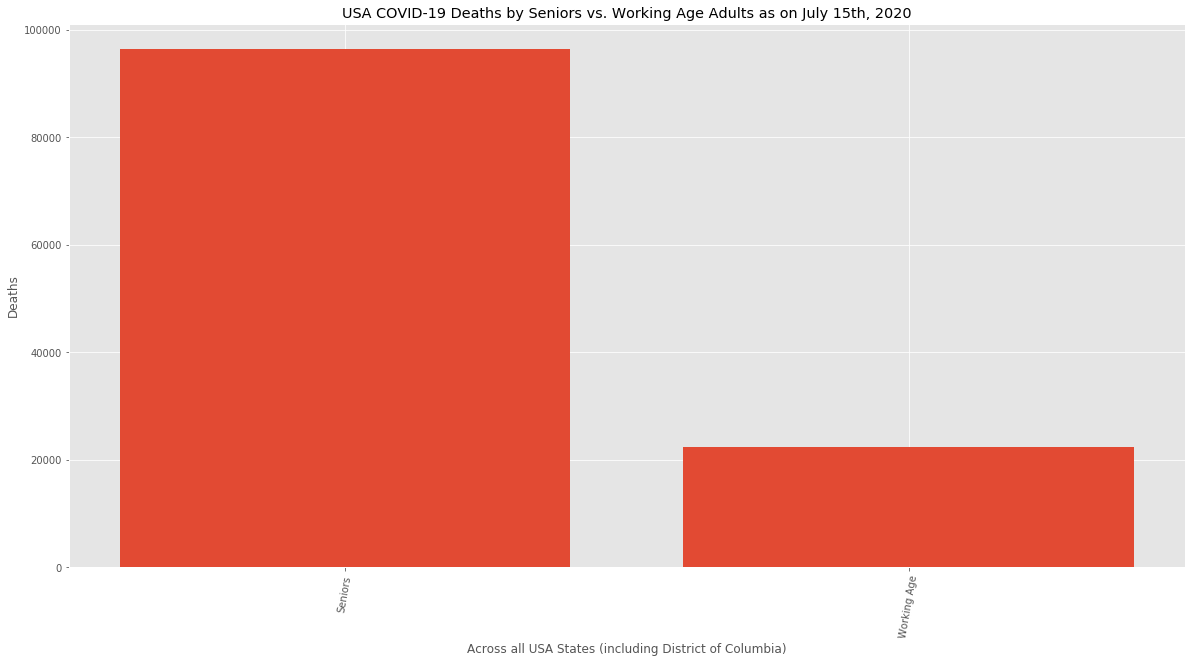

In [50]:
# Plot absolute
plot_bar("USA COVID-19 Deaths by Seniors vs. Working Age Adults as on July 15th, 2020", \
         "Across all USA States (including District of Columbia)", \
         "Deaths", \
         df_death_seniors_working['Age Group'], \
         df_death_seniors_working['Age Group'], \
         df_death_seniors_working['COVID-19 Deaths'], \
         'df_death_seniors_working', \
         80)

In [52]:
df_death_seniors_working['COVID-19 Deaths per Million'] \
= (df_death_seniors_working['COVID-19 Deaths'] / df_death_seniors_working['Population']) * 1_000_000


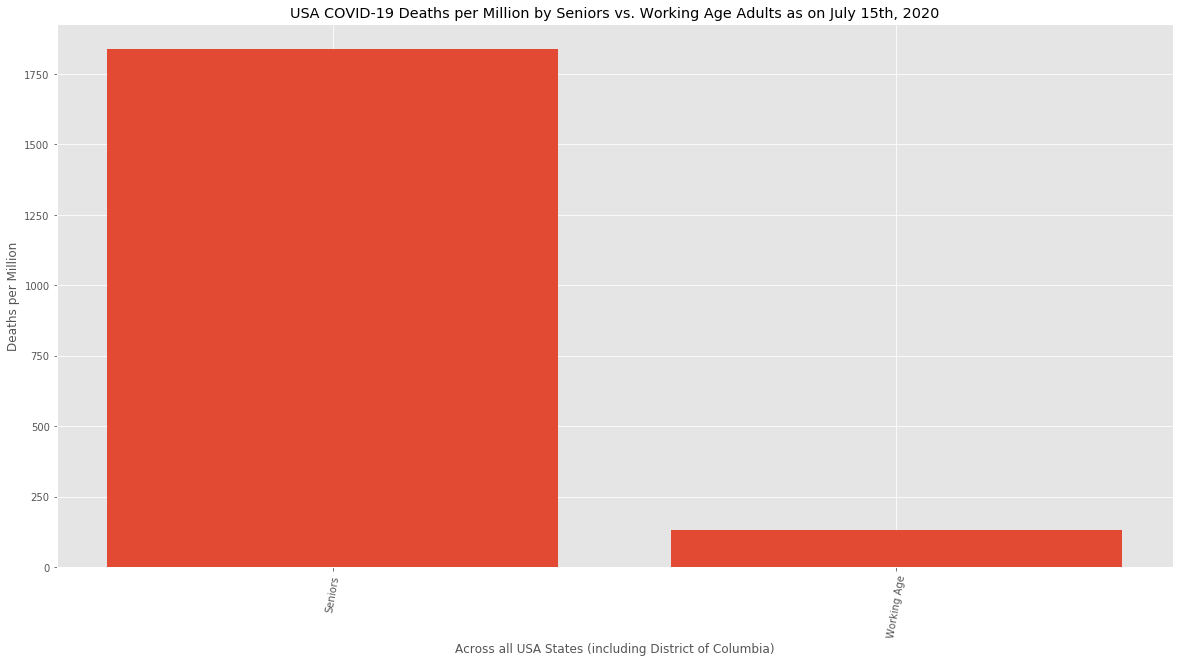

In [54]:
# Plot absolute
plot_bar("USA COVID-19 Deaths per Million by Seniors vs. Working Age Adults as on July 15th, 2020", \
         "Across all USA States (including District of Columbia)", \
         "Deaths per Million", \
         df_death_seniors_working['Age Group'], \
         df_death_seniors_working['Age Group'], \
         df_death_seniors_working['COVID-19 Deaths per Million'], \
         'df_death_seniors_working_per_million', \
         80)

In [653]:
N_seniors = 52431193.0
N_working = 170879997.0

k_seniors_per_million = (96312.0 / 52431193.0) * 1_000_000
k_working_per_million = (22289.0 / 170879997.0) * 1_000_000

# from statsmodels.stats.proportion import proportions_ztest
count = np.array([k_seniors_per_million, k_working_per_million])
nobs = np.array([1_000_000, 1_000_000])
stat, pval = proportions_ztest(count, nobs)
print('{0:0.3f}'.format(pval))
print(k_seniors_per_million)
print(k_working_per_million)

0.000
1836.921772884321
130.4365659603798
